# BOSTON Crime Classification

##Police Department Incident Reports: Historical 2022



###Reference:

1. https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry

2. https://www.kaggle.com/code/flafuji/sf-crime-eda-visualization-model-explained

3. https://github.com/joshlingy/SF-crime-data-analysis-and-modeling/blob/master/SF%20crime%20data%20analysis%20and%20modeling.ipynb

4. https://www.kaggle.com/code/klyushnik/san-francisco-crimes-catboostclassifier

5. https://towardsdatascience.com/deep-dive-into-sf-crime-cb8f5870a9f6

6. https://www.kaggle.com/code/abhishekr7/time-series-forecasting-on-crimes-in-boston

7. https://jovian.com/msameeruddin/00-cs1-eda-mv-tsa-bow-tfidf-final#C159

8. https://www.analyticsvidhya.com/blog/2021/07/performing-multi-class-classification-on-fifa-dataset-using-keras/

9. https://github.com/marcellusruben/sf-crime-voila

10. https://www.dominodatalab.com/blog/creating-interactive-crime-maps-with-folium

In [1]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import warnings
warnings.filterwarnings('ignore')

Install Geopandas for the MAP Visualization

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 46.6 MB/s eta 0:00:00


### Import Libraries

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [5]:
from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [6]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
%cd ./gdrive/Shareddrives/'ISE 244'/Dataset

/content/gdrive/Shareddrives/ISE 244/Dataset


## Data Overview

The dataset has 19 columns and the target attribute is Incident category

Link: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

In [8]:
df_2022 = pd.read_csv("Boston_Crime_dataset.csv") 

In [9]:
df_2022_req = pd.DataFrame()

## Mapping the data to address as part of AI Problem

Standardize the columns that can be mapped to similar dataset of 2018 to present 

In [10]:
df_2022_req = pd.DataFrame()
df_2022_req["Incident_Datetime"] = df_2022["OCCURRED_ON_DATE"]
df_2022_req["Report_Datetime"] = df_2022["OCCURRED_ON_DATE"]
df_2022_req["Report Type Code"] = "NA"
df_2022_req["Report Type Description"] = "NA"
df_2022_req["Filed Online"] = "NA"
df_2022_req["Incident_Date"] = pd.to_datetime(df_2022["OCCURRED_ON_DATE"]).dt.date
df_2022_req["Incident_Time"] =  pd.to_datetime(df_2022["OCCURRED_ON_DATE"]).dt.time
df_2022_req["DayOfWeek"] = df_2022["DAY_OF_WEEK"]
df_2022_req["Incident_Num"] = df_2022["INCIDENT_NUMBER"]
df_2022_req["Incident_Code"] = df_2022["OFFENSE_CODE"]
df_2022_req["Incident_Cat"] = df_2022["OFFENSE_DESCRIPTION"].astype(str).str.upper()
df_2022_req["Incident_Desc"] = df_2022["OFFENSE_DESCRIPTION"]
df_2022_req["Incident Subcategory"] = "NA"
df_2022_req["Address"] = df_2022["STREET"]
df_2022_req["Police_Dist"] = df_2022["DISTRICT"]
df_2022_req["Resolution"] = "NA"
df_2022_req["Analysis_Neigh"] = "NA"
df_2022_req["Neighborhoods"] = "NA"
df_2022_req["Central_Mar_Ten_Boun"] = "NA"
df_2022_req["Civic_Cen_Har_Red"] = "NA"
df_2022_req["Cur_Pol_Dist"] = "NA"
df_2022_req["Cur_Sup_Dist"] = "NA"
df_2022_req["HSOC_Zones"] = "NA"
df_2022_req["Longitude"] = df_2022["Long"]
df_2022_req["Latitude"] = df_2022["Lat"]

Address Null values

In [11]:
df_2022_req.loc[:, "Address"] = df_2022_req.loc[:, "Address"].fillna("NA")
df_2022_req.loc[:, "Police_Dist"] = df_2022_req.loc[:, "Police_Dist"].fillna("NA")

Verification for nulls

In [12]:
df_2022_req.isnull().sum()

Incident_Datetime             0
Report_Datetime               0
Report Type Code              0
Report Type Description       0
Filed Online                  0
Incident_Date                 0
Incident_Time                 0
DayOfWeek                     0
Incident_Num                  0
Incident_Code                 0
Incident_Cat                  0
Incident_Desc                 0
Incident Subcategory          0
Address                       0
Police_Dist                   0
Resolution                    0
Analysis_Neigh                0
Neighborhoods                 0
Central_Mar_Ten_Boun          0
Civic_Cen_Har_Red             0
Cur_Pol_Dist                  0
Cur_Sup_Dist                  0
HSOC_Zones                    0
Longitude                  3808
Latitude                   3808
dtype: int64

Sample data

In [13]:
df_2022_req.head()

Incident_Datetime      Report_Datetime Report Type Code  \
0  2022-01-01 00:00:00  2022-01-01 00:00:00               NA   
1  2022-01-01 00:00:00  2022-01-01 00:00:00               NA   
2  2022-01-01 00:00:00  2022-01-01 00:00:00               NA   
3  2022-01-01 00:00:00  2022-01-01 00:00:00               NA   
4  2022-01-01 00:00:00  2022-01-01 00:00:00               NA   

  Report Type Description Filed Online Incident_Date Incident_Time DayOfWeek  \
0                      NA           NA    2022-01-01      00:00:00  Saturday   
1                      NA           NA    2022-01-01      00:00:00  Saturday   
2                      NA           NA    2022-01-01      00:00:00  Saturday   
3                      NA           NA    2022-01-01      00:00:00  Saturday   
4                      NA           NA    2022-01-01      00:00:00  Saturday   

  Incident_Num  Incident_Code  ... Resolution Analysis_Neigh Neighborhoods  \
0    222076257            619  ...         NA             NA            NA   
1    222053099           2670  ...         NA             NA            NA   
2    222039411           3201  ...         NA             NA            NA   
3    222011090           3201  ...         NA             NA            NA   
4    222062685           3201  ...         NA             NA            NA   

  Central_Mar_Ten_Boun Civic_Cen_Har_Red Cur_Pol_Dist Cur_Sup_Dist HSOC_Zones  \
0                   NA                NA           NA           NA         NA   
1                   NA                NA           NA           NA         NA   
2                   NA                NA           NA           NA         NA   
3                   NA                NA           NA           NA         NA   
4                   NA                NA           NA           NA         NA   

   Longitude   Latitude  
0 -71.069409  42.339542  
1 -71.032597  42.377246  
2 -71.150498  42.349056  
3 -71.091374  42.284826  
4 -71.091374  42.284826  

[5 rows x 25 columns]

## Time Manupulation

Function to create the new feature Year, Month, day, Hour, Week_of_year, TimeOfDay and SeasonOfYear

In [14]:
def time_engineer(data):
    '''
    Extract temporal features from dates.
    '''
    # Turn strings into timestamp objects
    data.Incident_Datetime = pd.to_datetime(data.Incident_Datetime)

    # Extract years, months, times of the day, and weeks of year
    data['Year'] = data['Incident_Datetime'].dt.year
    data['Month'] = data['Incident_Datetime'].dt.month
    data['Day'] = data['Incident_Datetime'].dt.day
    data['Hour'] = data['Incident_Datetime'].dt.hour
    data['Week_Of_Year'] = data['Incident_Datetime'].dt.weekofyear


    # Add times of a day as String
    data.loc[(data['Hour']< 6) & (data['Hour']>=0),'TimeOfDay'] = 'Night'
    data.loc[(data['Hour']>=6) & (data['Hour']<12),'TimeOfDay'] = 'Morning'
    data.loc[(data['Hour']>=12) & (data['Hour']<18),'TimeOfDay'] = 'Afternoon'
    data.loc[(data['Hour']>=18) & (data['Hour']<24),'TimeOfDay'] = 'Evening'
    
    # Add seasons as String
    data.loc[(data['Month']>=3) & (data['Month']<6),'SeasonOfYear'] = 'Spring'
    data.loc[(data['Month']>=6) & (data['Month']<9),'SeasonOfYear'] = 'Summer'
    data.loc[(data['Month']>=9) & (data['Month']<12),'SeasonOfYear'] = 'Autumn'
    data.loc[(data['Month']<=2) | (data['Month']==12),'SeasonOfYear'] = 'Winter'
       
    return data

In [15]:
time_engineer(df_2022_req)

Incident_Datetime      Report_Datetime Report Type Code  \
0     2022-01-01 00:00:00  2022-01-01 00:00:00               NA   
1     2022-01-01 00:00:00  2022-01-01 00:00:00               NA   
2     2022-01-01 00:00:00  2022-01-01 00:00:00               NA   
3     2022-01-01 00:00:00  2022-01-01 00:00:00               NA   
4     2022-01-01 00:00:00  2022-01-01 00:00:00               NA   
...                   ...                  ...              ...   
73847 2022-12-31 23:30:00  2022-12-31 23:30:00               NA   
73848 2022-12-31 23:37:00  2022-12-31 23:37:00               NA   
73849 2022-12-31 23:45:00  2022-12-31 23:45:00               NA   
73850 2022-12-31 23:50:00  2022-12-31 23:50:00               NA   
73851 2022-12-31 23:50:00  2022-12-31 23:50:00               NA   

      Report Type Description Filed Online Incident_Date Incident_Time  \
0                          NA           NA    2022-01-01      00:00:00   
1                          NA           NA    2022-01-01      00:00:00   
2                          NA           NA    2022-01-01      00:00:00   
3                          NA           NA    2022-01-01      00:00:00   
4                          NA           NA    2022-01-01      00:00:00   
...                       ...          ...           ...           ...   
73847                      NA           NA    2022-12-31      23:30:00   
73848                      NA           NA    2022-12-31      23:37:00   
73849                      NA           NA    2022-12-31      23:45:00   
73850                      NA           NA    2022-12-31      23:50:00   
73851                      NA           NA    2022-12-31      23:50:00   

      DayOfWeek Incident_Num  Incident_Code  ... HSOC_Zones  Longitude  \
0      Saturday    222076257            619  ...         NA -71.069409   
1      Saturday    222053099           2670  ...         NA -71.032597   
2      Saturday    222039411           3201  ...         NA -71.150498   
3      Saturday    222011090           3201  ...         NA -71.091374   
4      Saturday    222062685           3201  ...         NA -71.091374   
...         ...          ...            ...  ...        ...        ...   
73847  Saturday    232000091           1402  ...         NA -71.070782   
73848  Saturday    232000002           3831  ...         NA -71.062607   
73849  Saturday    232000140            619  ...         NA -71.150498   
73850  Saturday    232000315           3201  ...         NA        NaN   
73851  Saturday    232000052           3114  ...         NA -71.069680   

        Latitude  Year Month Day Hour Week_Of_Year TimeOfDay SeasonOfYear  
0      42.339542  2022     1   1    0           52     Night       Winter  
1      42.377246  2022     1   1    0           52     Night       Winter  
2      42.349056  2022     1   1    0           52     Night       Winter  
3      42.284826  2022     1   1    0           52     Night       Winter  
4      42.284826  2022     1   1    0           52     Night       Winter  
...          ...   ...   ...  ..  ...          ...       ...          ...  
73847  42.359790  2022    12  31   23           52   Evening       Winter  
73848  42.319593  2022    12  31   23           52   Evening       Winter  
73849  42.349056  2022    12  31   23           52   Evening       Winter  
73850        NaN  2022    12  31   23           52   Evening       Winter  
73851  42.357879  2022    12  31   23           52   Evening       Winter  

[73852 rows x 32 columns]

# This is For the dataset from 2003 to 2018

Filter and exclude the invalid/not better fit values

In [16]:
data = df_2022_req[df_2022_req["Latitude"].notnull()]

In [17]:
data.head()

Incident_Datetime      Report_Datetime Report Type Code  \
0        2022-01-01  2022-01-01 00:00:00               NA   
1        2022-01-01  2022-01-01 00:00:00               NA   
2        2022-01-01  2022-01-01 00:00:00               NA   
3        2022-01-01  2022-01-01 00:00:00               NA   
4        2022-01-01  2022-01-01 00:00:00               NA   

  Report Type Description Filed Online Incident_Date Incident_Time DayOfWeek  \
0                      NA           NA    2022-01-01      00:00:00  Saturday   
1                      NA           NA    2022-01-01      00:00:00  Saturday   
2                      NA           NA    2022-01-01      00:00:00  Saturday   
3                      NA           NA    2022-01-01      00:00:00  Saturday   
4                      NA           NA    2022-01-01      00:00:00  Saturday   

  Incident_Num  Incident_Code  ... HSOC_Zones  Longitude   Latitude  Year  \
0    222076257            619  ...         NA -71.069409  42.339542  2022   
1    222053099           2670  ...         NA -71.032597  42.377246  2022   
2    222039411           3201  ...         NA -71.150498  42.349056  2022   
3    222011090           3201  ...         NA -71.091374  42.284826  2022   
4    222062685           3201  ...         NA -71.091374  42.284826  2022   

  Month Day Hour Week_Of_Year TimeOfDay SeasonOfYear  
0     1   1    0           52     Night       Winter  
1     1   1    0           52     Night       Winter  
2     1   1    0           52     Night       Winter  
3     1   1    0           52     Night       Winter  
4     1   1    0           52     Night       Winter  

[5 rows x 32 columns]

##Exploratory Data Analysis

### Data Visualization

Visualize the data for DayOfWeek, Police Distict, Resolution and Incident category

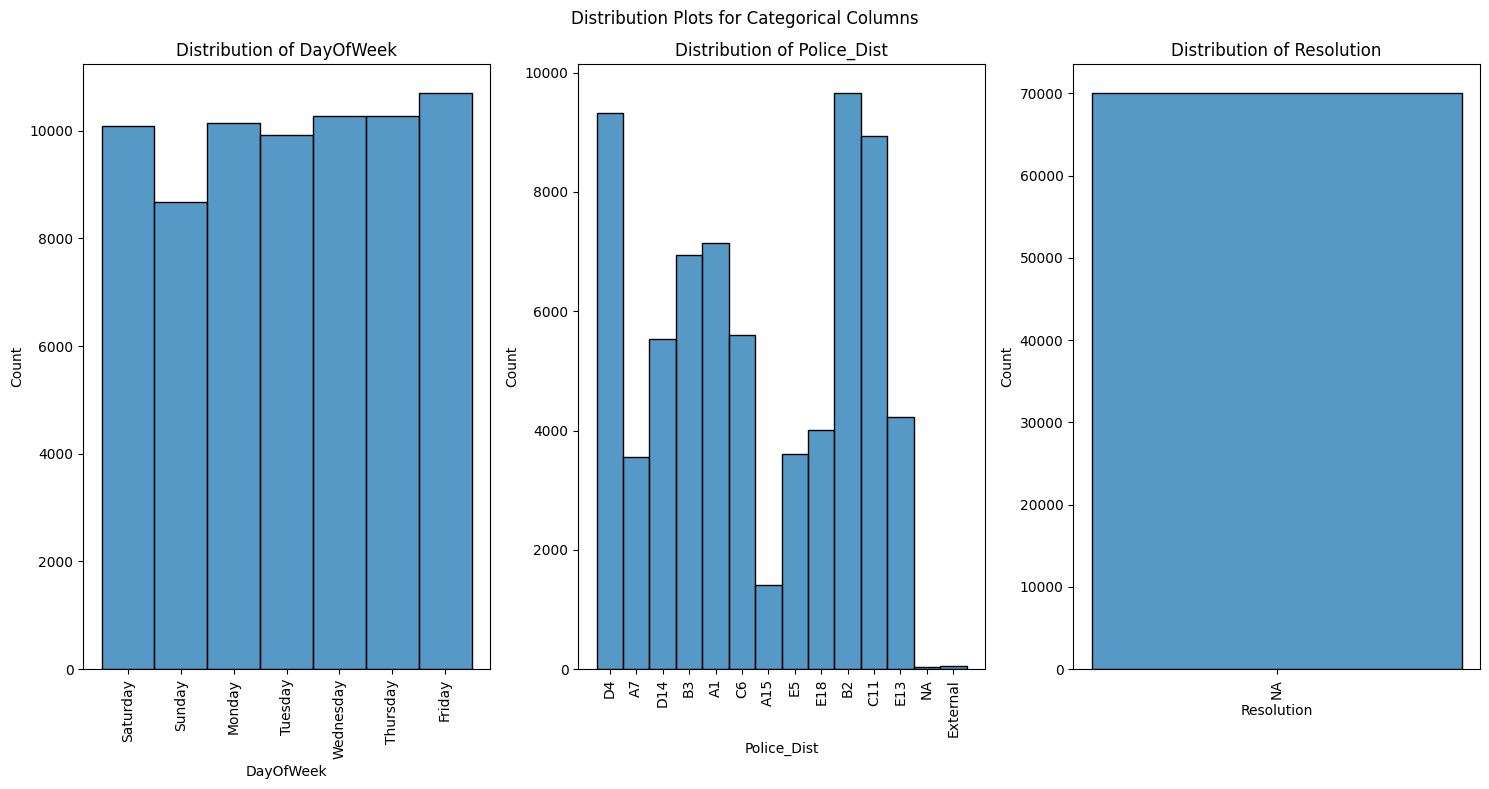

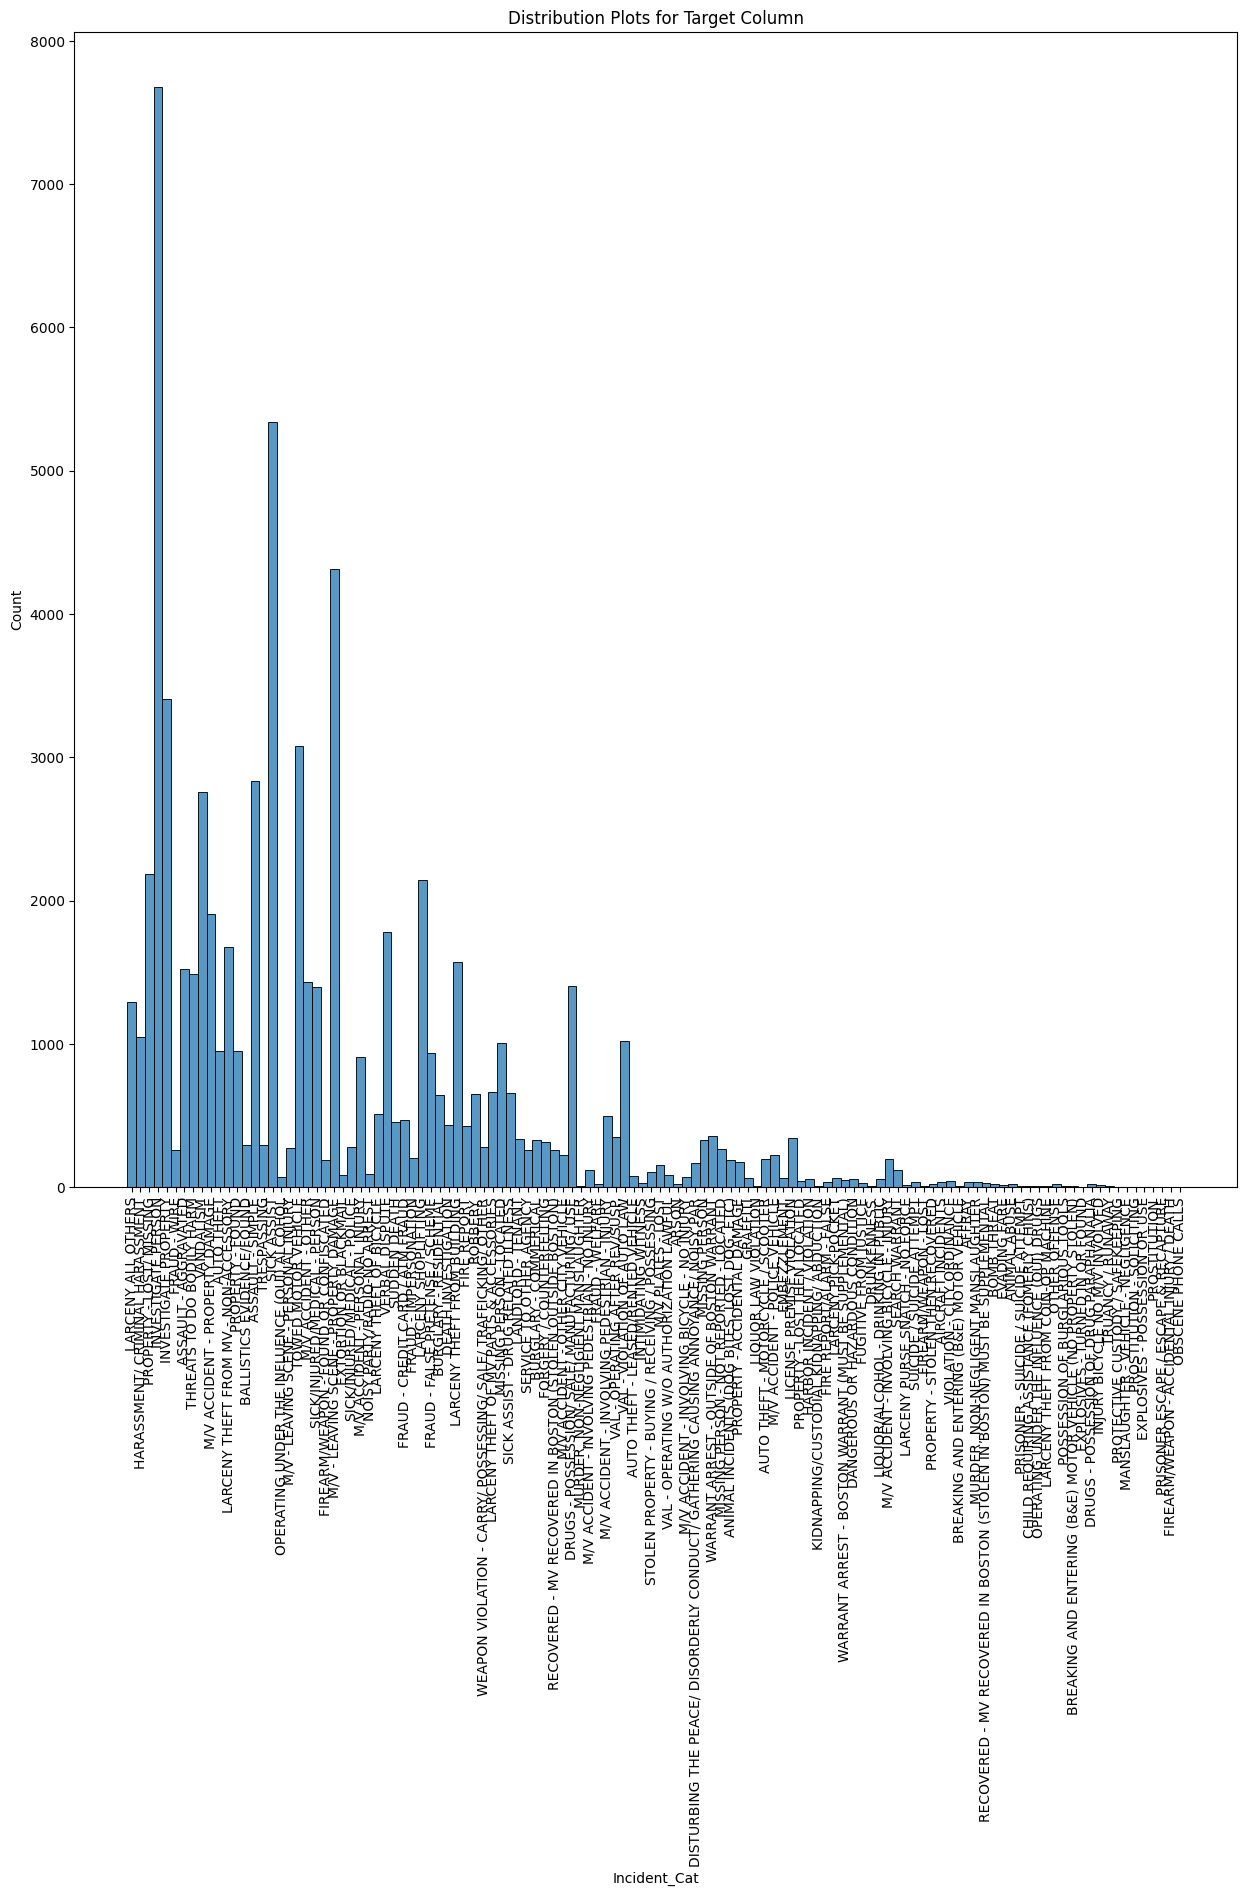

In [18]:
# categorical columns
categorical_columns_for_visualization = ['DayOfWeek', 'Police_Dist','Resolution']
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Distribution Plots for Categorical Columns')
axes = axes.ravel()
for index,col in enumerate(categorical_columns_for_visualization): 
    sns.histplot(data[col],ax=axes[index])
    axes[index].tick_params(axis='x', rotation=90)
    axes[index].set_title('Distribution of %s' %col )
fig.tight_layout();

# target columns
target_column_for_visualization = 'Incident_Cat'
plt.figure(figsize=(15,15))
sns.histplot(data[target_column_for_visualization])
plt.xticks(rotation=90)
plt.title('Distribution Plots for Target Column')
fig.tight_layout();

LARCENTY THEFT is the highest number of crimes commited as per the police record.

Friday is the peak window for the crime and Most of the police department are falling into high number of crimes.

Identify the mapping values for the incident category

In [19]:
j=0
for i in data['Incident_Cat'].sort_values().unique():
    j +=1
    print("'" + str(i) +"':" + str(j) + ",")

'AFFRAY':1,
'AIRCRAFT INCIDENTS':2,
'ANIMAL ABUSE':3,
'ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)':4,
'ARSON':5,
'ASSAULT - AGGRAVATED':6,
'ASSAULT - SIMPLE':7,
'AUTO THEFT':8,
'AUTO THEFT - LEASED/RENTED VEHICLE':9,
'AUTO THEFT - MOTORCYCLE / SCOOTER':10,
'BALLISTICS EVIDENCE/FOUND':11,
'BOMB THREAT':12,
'BREAKING AND ENTERING (B&E) MOTOR VEHICLE':13,
'BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO PROPERTY STOLEN)':14,
'BURGLARY - COMMERICAL':15,
'BURGLARY - RESIDENTIAL':16,
'CHILD REQUIRING ASSISTANCE (FOMERLY CHINS)':17,
'DANGEROUS OR HAZARDOUS CONDITION':18,
'DEATH INVESTIGATION':19,
'DISTURBING THE PEACE/ DISORDERLY CONDUCT/ GATHERING CAUSING ANNOYANCE/ NOISY PAR':20,
'DRUGS - POSSESSION OF DRUG PARAPHANALIA':21,
'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE':22,
'DRUNKENNESS':23,
'EMBEZZLEMENT':24,
'EVADING FARE':25,
'EXPLOSIVES - POSSESSION OR USE':26,
'EXPLOSIVES - TURNED IN OR FOUND':27,
'EXTORTION OR BLACKMAIL':28,
'FIRE REPORT':29,
'FIRE REPORT/ALARM - FALSE':30,
'FIREARM/W

There are 50 Incident categories.

Identify the geometry value as new column to plat the map

In [20]:
crs = {'init': 'epsg:4326'}

# convention is longitude, latitude
geometry = [Point(xy) for xy in zip( data["Longitude"], data["Latitude"])]

geometry[:3]

[<POINT (-71.069 42.34)>, <POINT (-71.033 42.377)>, <POINT (-71.15 42.349)>]

In [21]:
geo_df = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

<Axes: >

(42.21440996, 42.46141002)

(-71.34946995, -70.95372636)

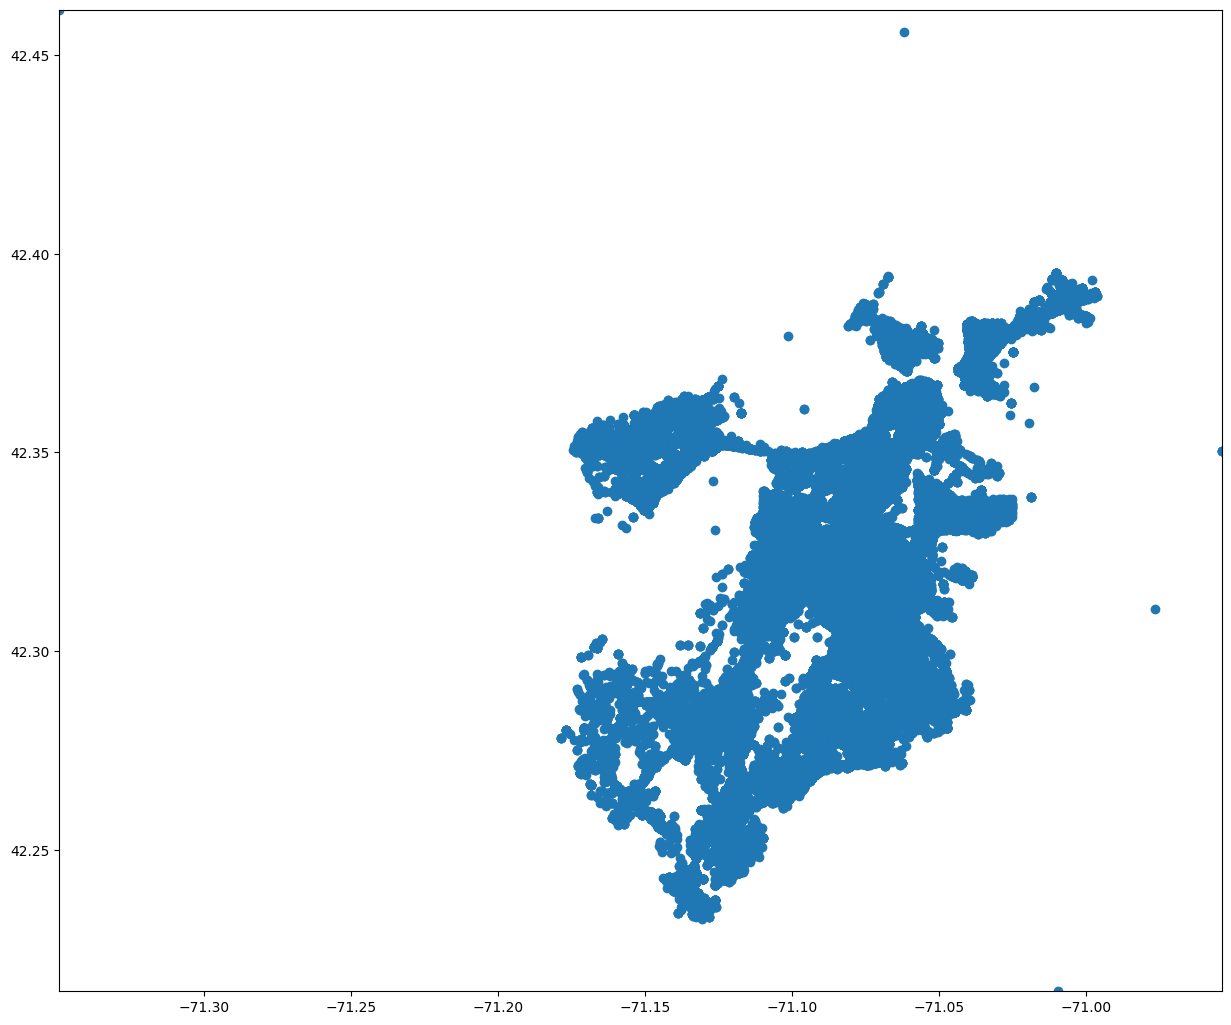

In [22]:
fig, ax = plt.subplots(figsize = (15,15))
geo_df.plot(ax = ax)
ax.set_ylim(data["Latitude"].min(),data["Latitude"].max())
ax.set_xlim(data["Longitude"].min(), data["Longitude"].max())

The map clearly shows more number of incidents are concentrated towards the north of SFO

### Scatterplot map for crime category

<Axes: xlabel='Longitude', ylabel='Latitude'>

Text(0.5, 1.0, 'Scatterplot of category crimes')

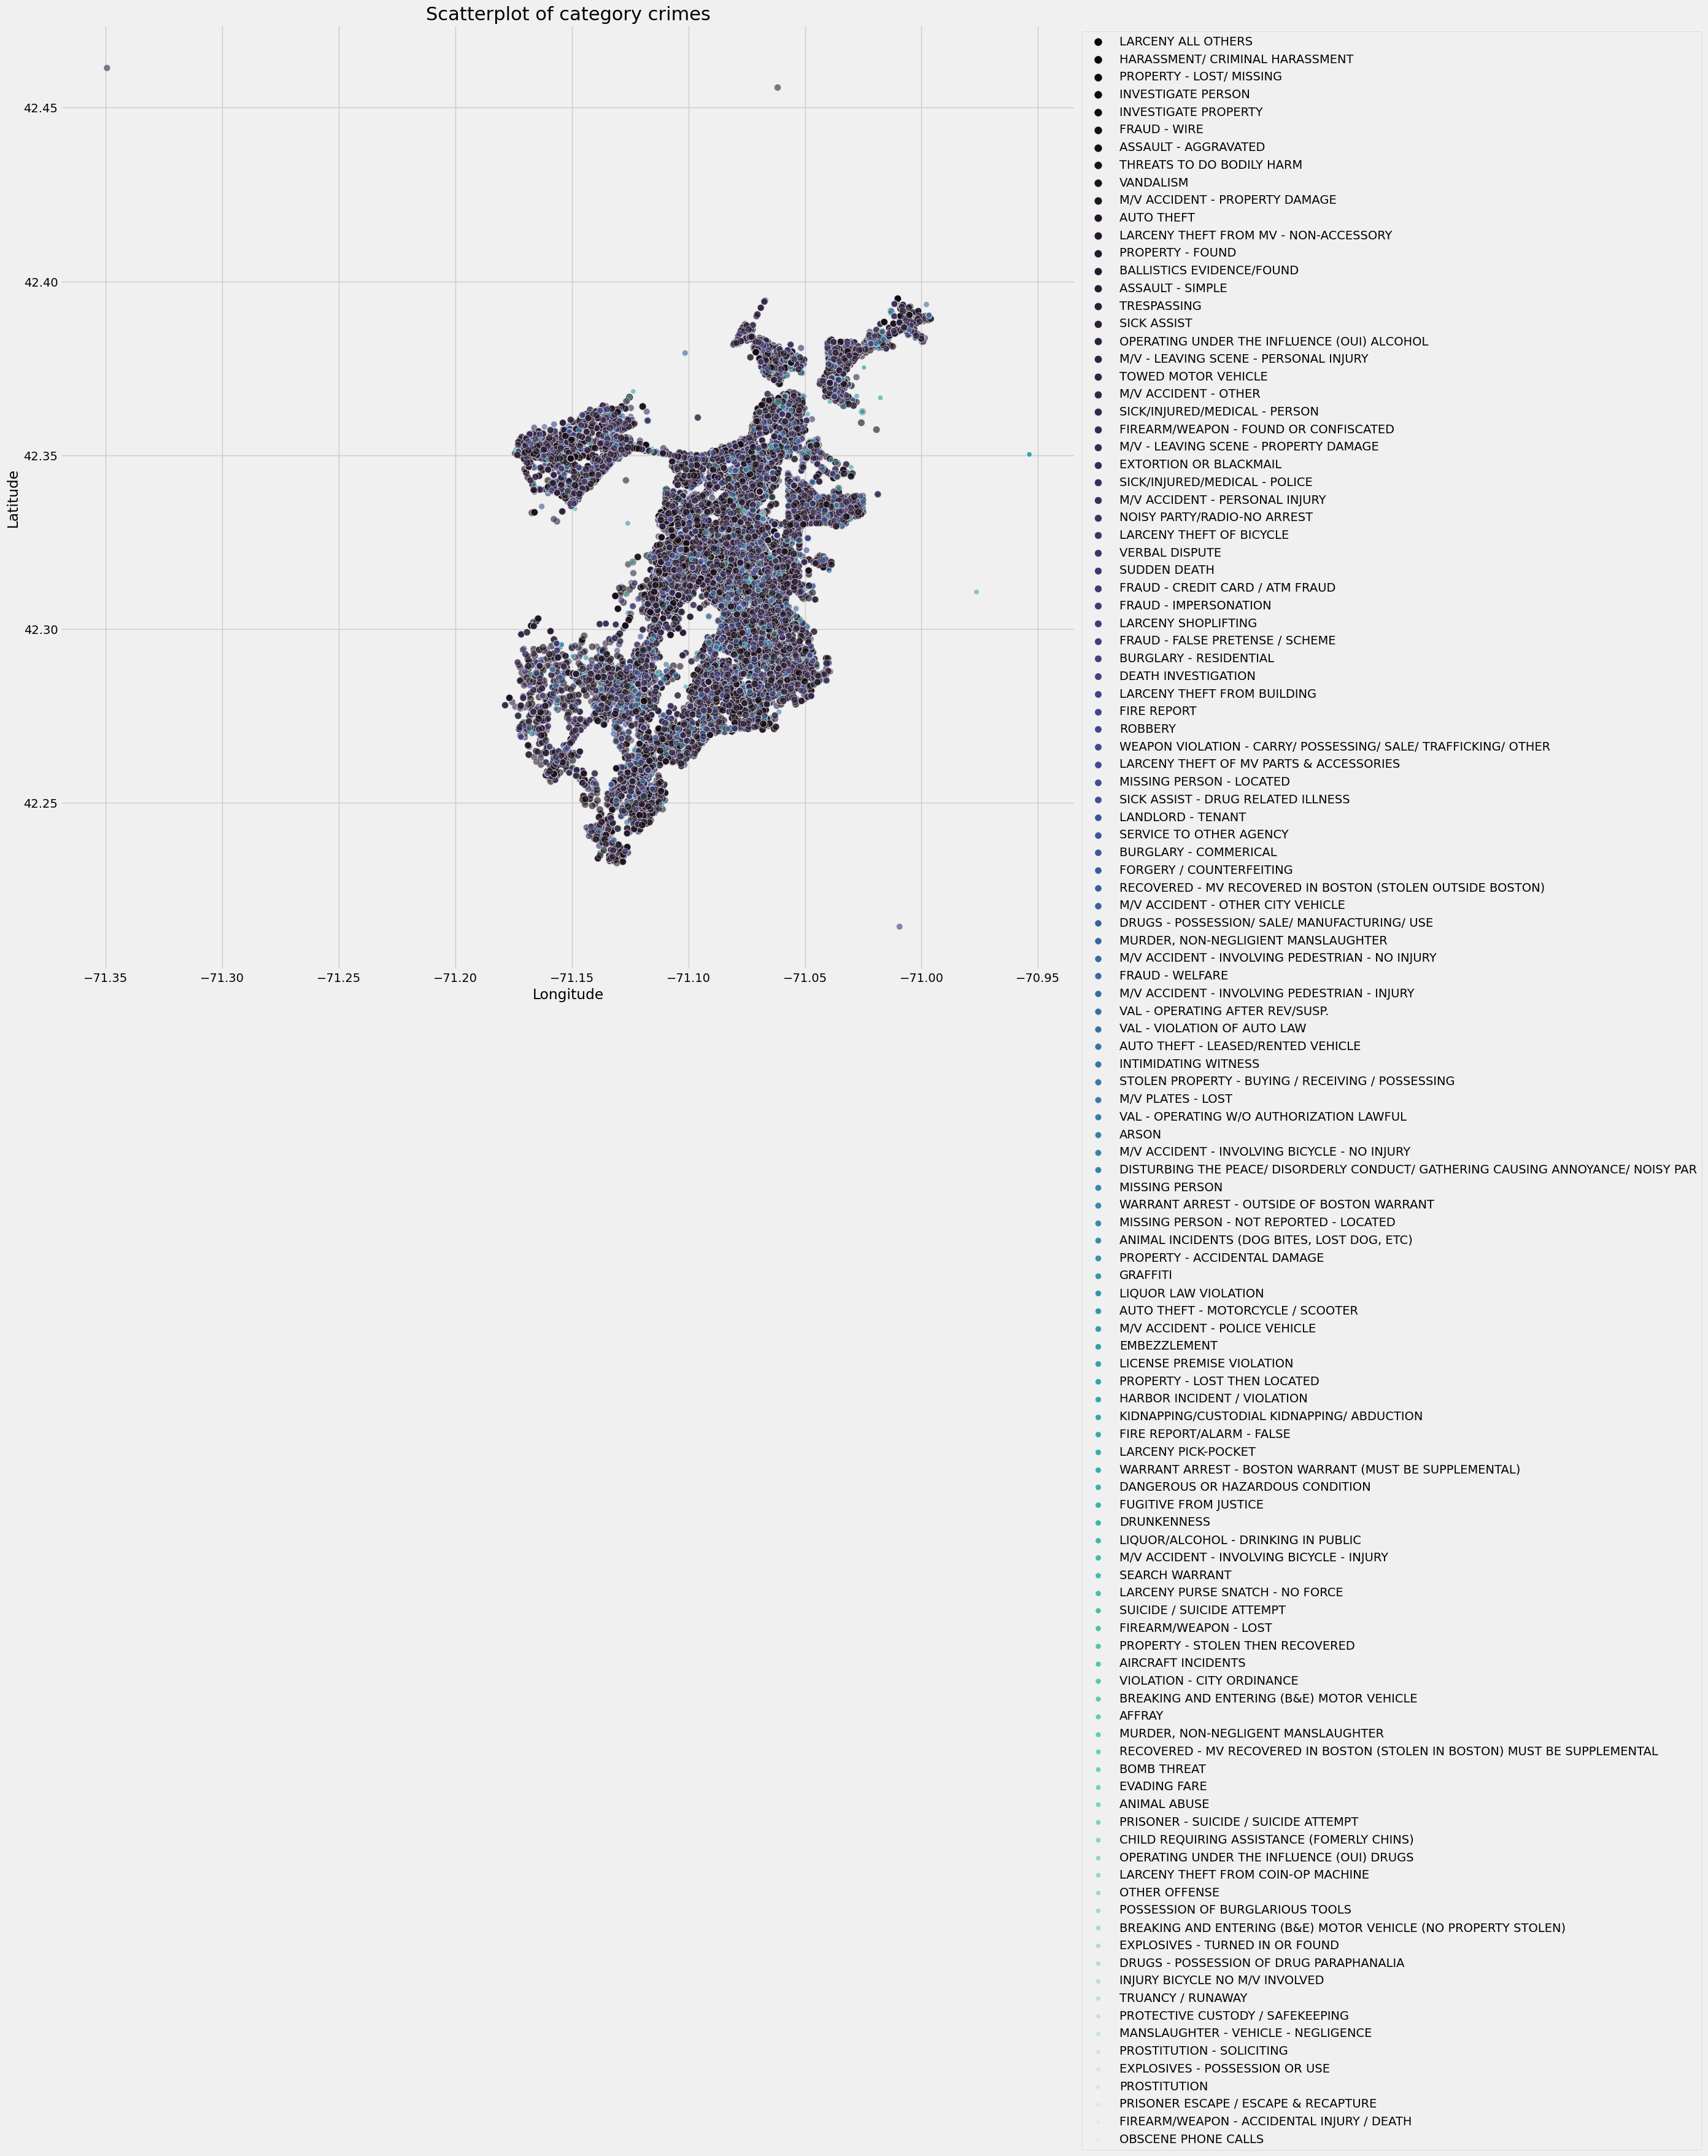

In [23]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=data.iloc[:250000], x='Longitude', y='Latitude', alpha=0.6, palette='mako', hue='Incident_Cat', size='Incident_Cat')
    plt.title("Scatterplot of category crimes", fontsize=22) 
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show();

### Chart to visualize Top 15 common crimes

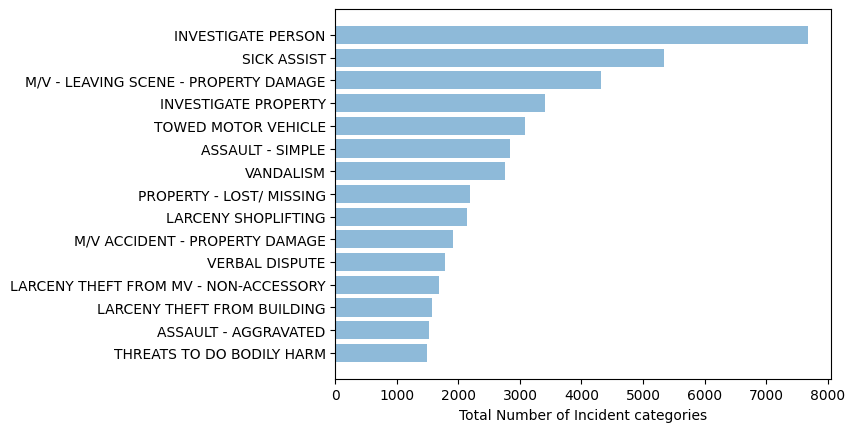

In [24]:

most_common_cat = data['Incident_Cat'].value_counts()[0:15].sort_values()

categs = most_common_cat.index
y_pos = np.arange(len(categs))
counts = most_common_cat.values

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, categs)
plt.xlabel('Total Number of Incident categories')
plt.show();

### HeatMap for Incident Category vs Weekday

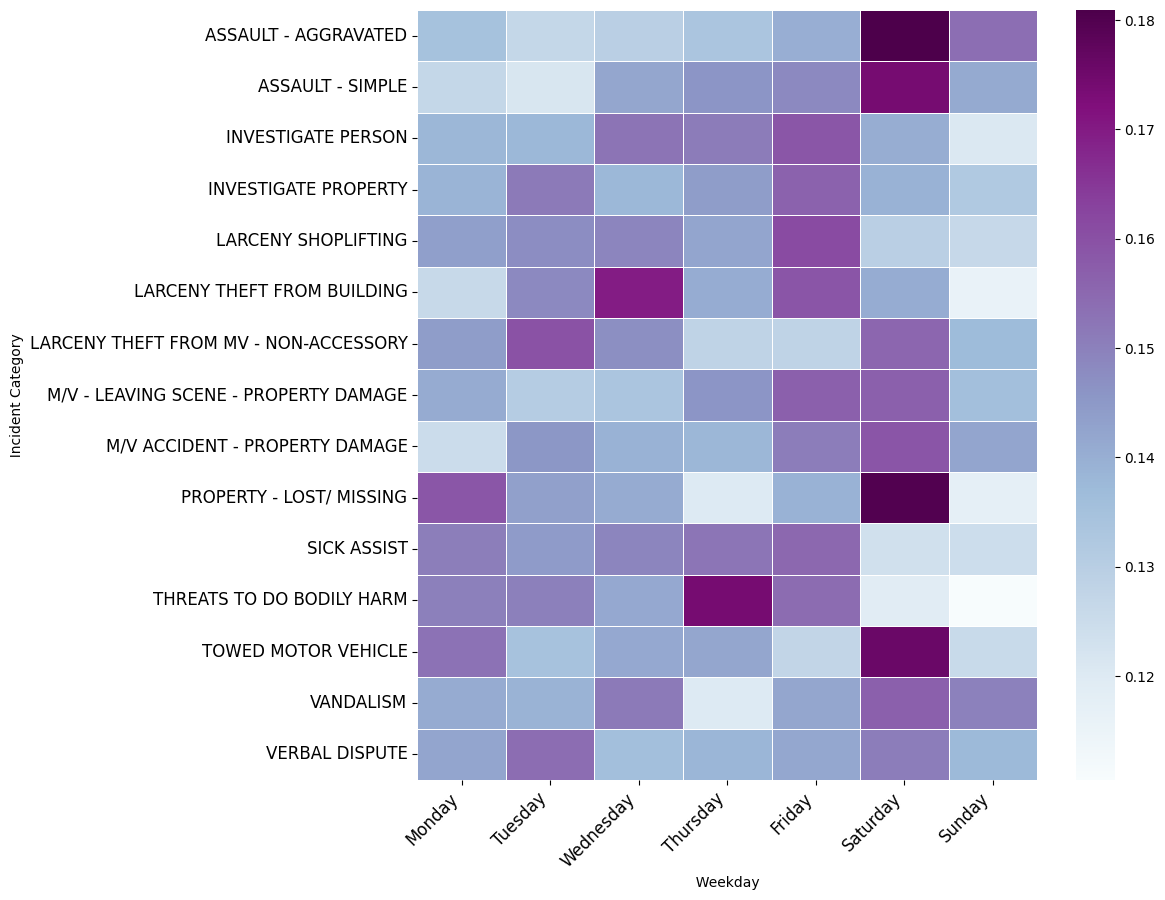

In [25]:
# Most common crimes from incident category
most_commons = data[data['Incident_Cat'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Incident_Cat'], most_commons['DayOfWeek']) 
# Calculate percentages of crimes
cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[['Monday', 
                                           'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 
                                           'Saturday','Sunday']]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("  Weekday  ")
plt.ylabel("  Incident Category  ")
plt.show();

Wednesday is peak for Drug offences. Friday is the peak window for Burglary and missing person. Wednesday is peak for Drug/Narcotic crimes.

### Visualizing the crime that are happening on Sunday

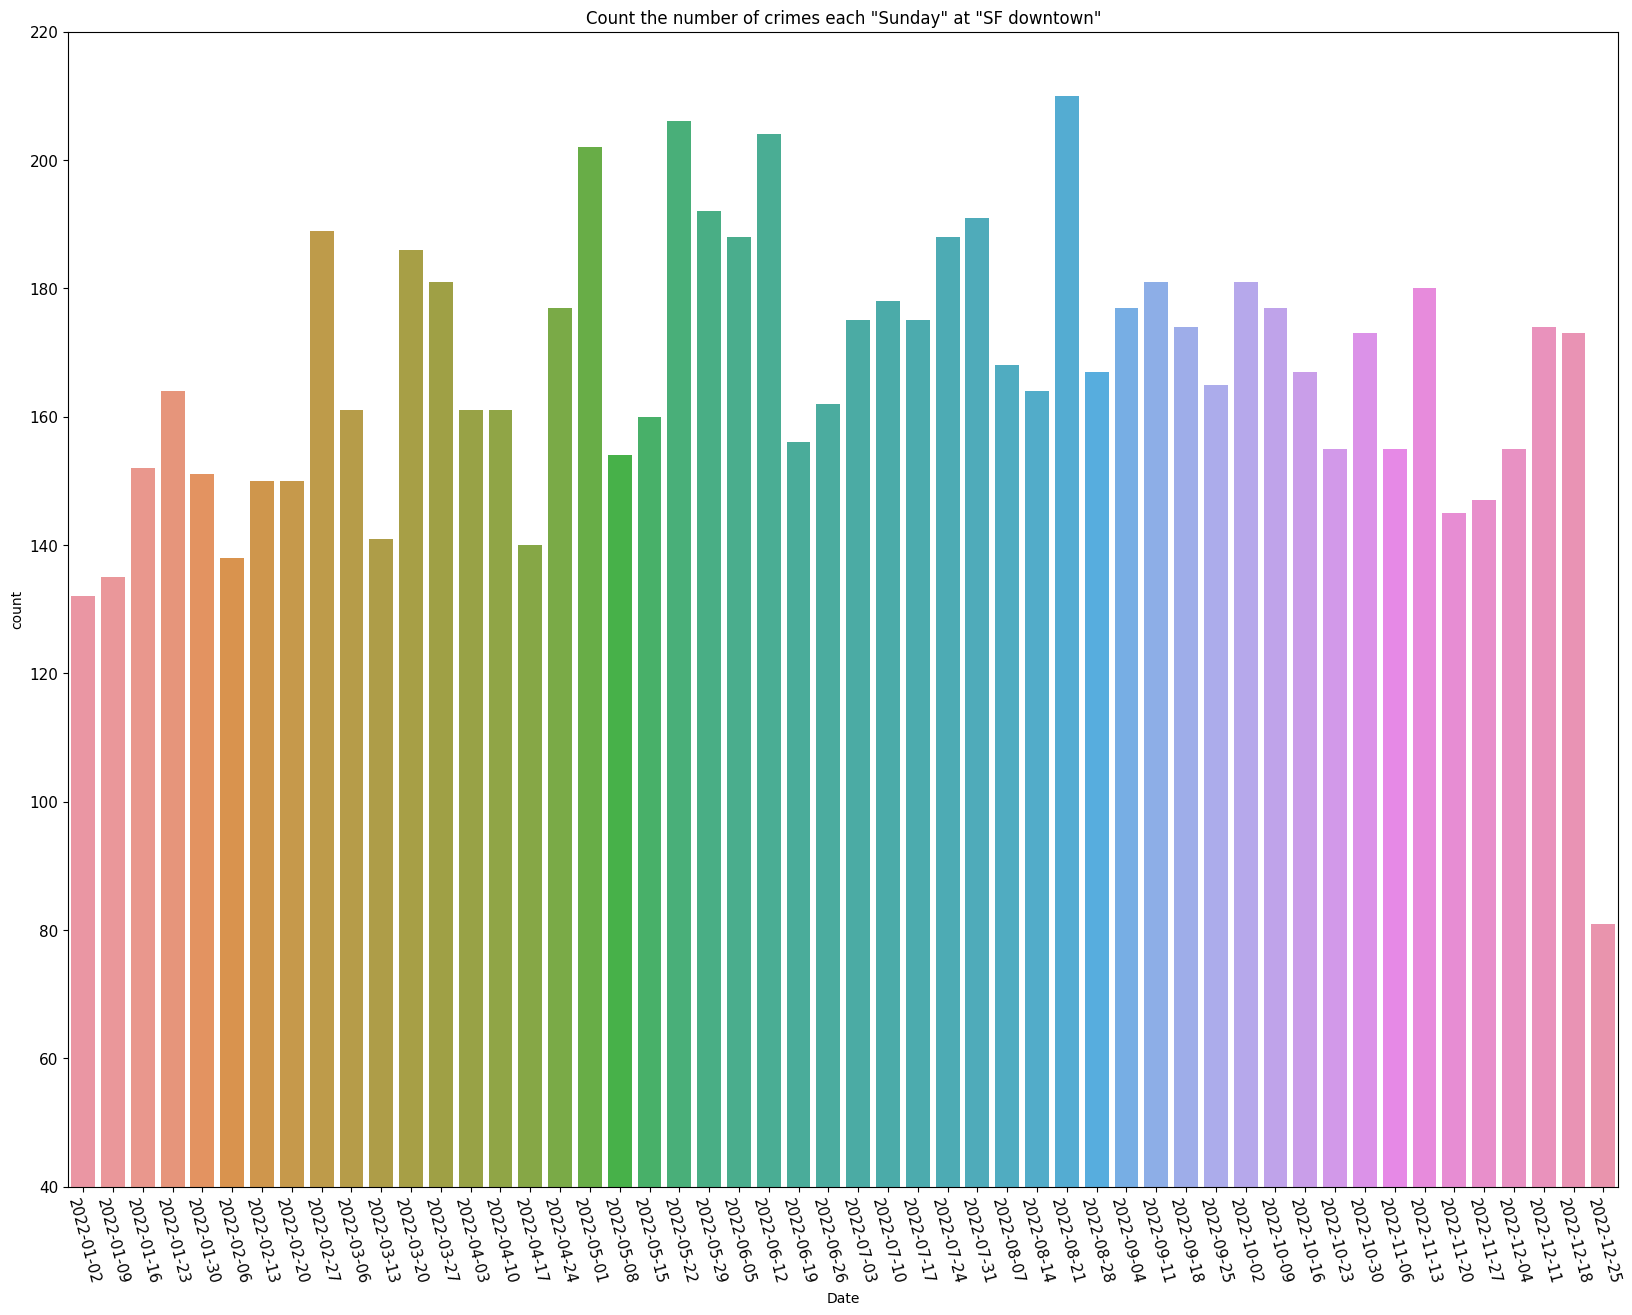

In [26]:
sun_data = data[(data['DayOfWeek'] == 'Sunday') & (data['Year'] == 2022 )].groupby(['Incident_Date','DayOfWeek']).agg({'Incident_Num':['count']})
sun_data.columns = ['Inc_count']
sun_data = sun_data.reset_index()

fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='Incident_Date',y='Inc_count',
                 data= sun_data)
ax.set_title('Count the number of crimes each "Sunday" at "SF downtown"')
ax.set_xlabel('Date')
ax.set_ylabel('count')


ax.set_ylim([40,220])
plt.xticks(rotation=-75) #important!
plt.tick_params(labelsize=11) #important!
plt.show();

More number of crimes during summer and Fall seasons.

In [27]:
mon_data = data[(data['Month'] == 6)].groupby(['Year','Month']).agg({'Incident_Num':['count']})
mon_data.columns = ['Inc_count']
mon_data = mon_data.reset_index()

fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='Year',y='Inc_count',
                 data= mon_data)
ax.set_title('Count the number of crimes in June month at "SF downtown"')
ax.set_xlabel('Month')
ax.set_ylabel('Incident count')


ax.set_ylim([1000,8000])
plt.xticks(rotation=-75) #important!
plt.tick_params(labelsize=11) #important!
plt.show();

The number of crimes has decreased during 2020 might be because of pandamic.

In [28]:
year_data = data[(data['Year'] == 2022)].groupby(['Month']).agg({'Incident_Num':['count']})
year_data.columns = ['Inc_count']
year_data = year_data.reset_index()

fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='Month',y='Inc_count',
                 data= year_data)
ax.set_title('Count the number of crimes in June month at "SF downtown"')
ax.set_xlabel('Month')
ax.set_ylabel('Incident count')


ax.set_ylim([2000,7000])
plt.xticks(rotation=-75) #important!
plt.tick_params(labelsize=11) #important!
plt.show();

Summer and Fall are more prone to crimes.

### Most common category based on Time Of Day

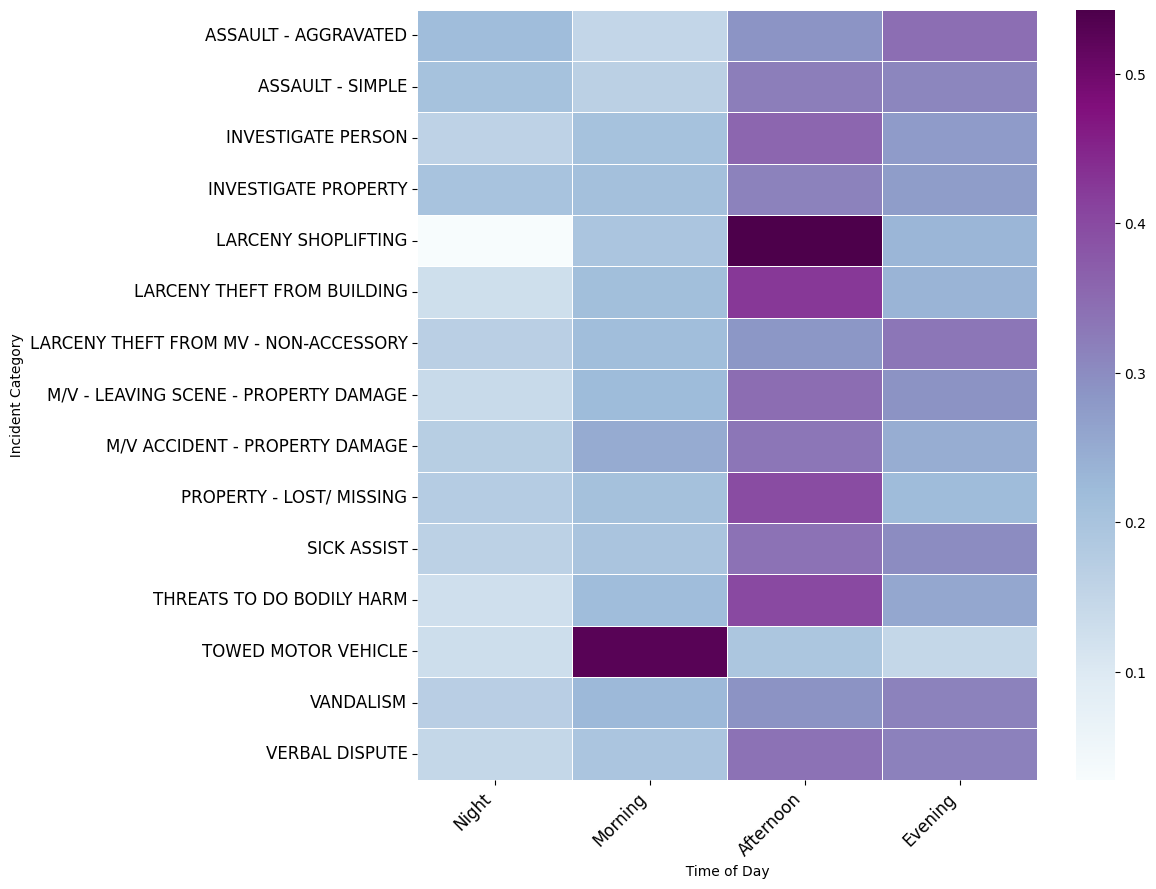

In [29]:
# Most common crimes from incident category
most_commons = data[data['Incident_Cat'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Incident_Cat'], most_commons['TimeOfDay']) 

cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[['Night', 
                                           'Morning', 'Afternoon', 
                                           'Evening']]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("  Time of Day  ")
plt.ylabel("  Incident Category  ")
plt.show();

Most of the crimes are happening during Afternoon and few are in the Evening hours.

### Most common category based on Season of the Year

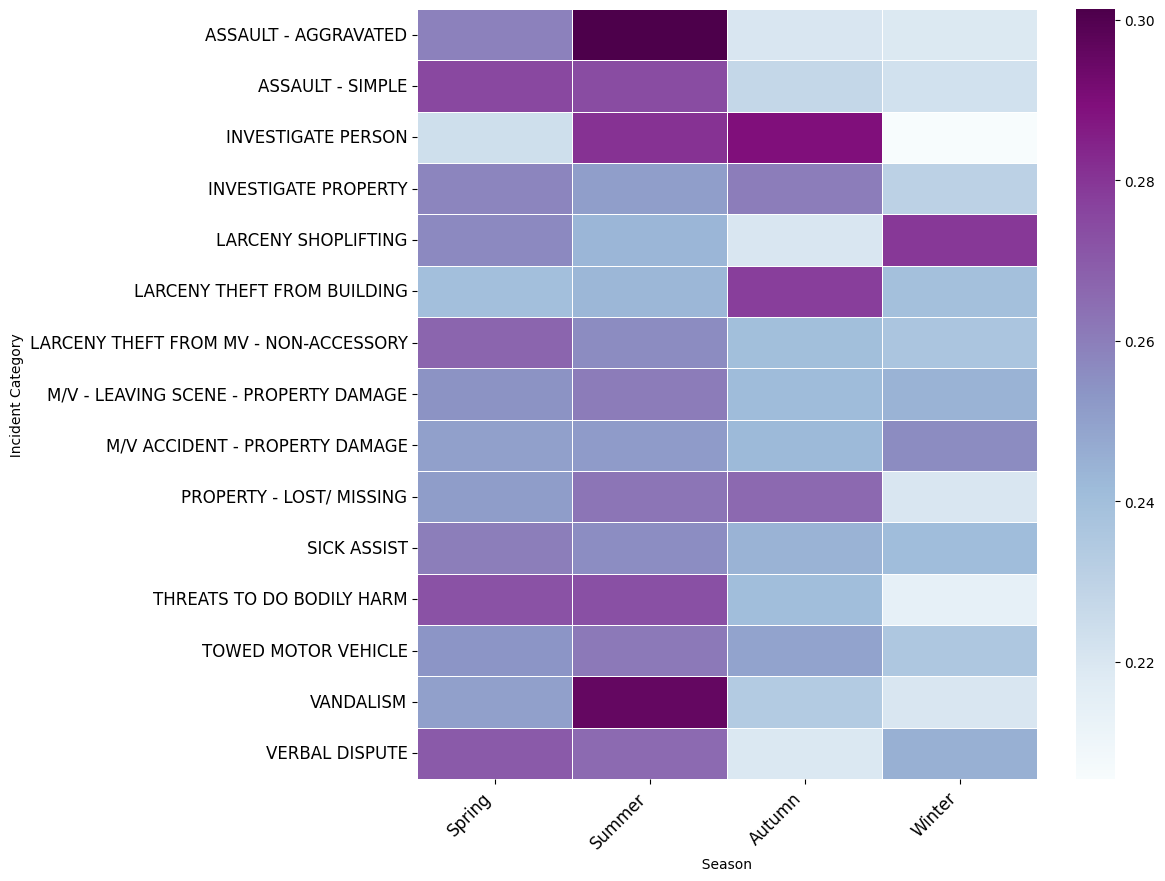

In [30]:
# Most common crimes from incident category
most_commons = data[data['Incident_Cat'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Incident_Cat'], most_commons['SeasonOfYear']) 

cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[['Spring', 
                                           'Summer', 'Autumn', 
                                           'Winter']]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("  Season  ")
plt.ylabel("  Incident Category  ")
plt.show();

The crime activities has been shifted to Winter season.

## Feature Engineering

#### Converting the text to numerical values for the required features

In [31]:
dayofweek_replace={'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}
season_replace = {'Spring':1,'Summer':2,'Autumn':3,'Winter':4}
timeofday_replace={'Night':1,'Morning':2,'Afternoon':3,'Evening':4}
policedst_replace={'A1':1,
'A15':2,
'A7':3,
'B2':4,
'B3':5,
'C11':6,
'C6':7,
'D14':8,
'D4':9,
'E13':10,
'E18':11,
'E5':12,
'External':13,
'NA':14}

In [32]:
category_replace = {'AFFRAY':1,
'AIRCRAFT INCIDENTS':2,
'ANIMAL ABUSE':3,
'ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)':4,
'ARSON':5,
'ASSAULT - AGGRAVATED':6,
'ASSAULT - SIMPLE':7,
'AUTO THEFT':8,
'AUTO THEFT - LEASED/RENTED VEHICLE':9,
'AUTO THEFT - MOTORCYCLE / SCOOTER':10,
'BALLISTICS EVIDENCE/FOUND':11,
'BOMB THREAT':12,
'BREAKING AND ENTERING (B&E) MOTOR VEHICLE':13,
'BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO PROPERTY STOLEN)':14,
'BURGLARY - COMMERICAL':15,
'BURGLARY - RESIDENTIAL':16,
'CHILD REQUIRING ASSISTANCE (FOMERLY CHINS)':17,
'DANGEROUS OR HAZARDOUS CONDITION':18,
'DEATH INVESTIGATION':19,
'DISTURBING THE PEACE/ DISORDERLY CONDUCT/ GATHERING CAUSING ANNOYANCE/ NOISY PAR':20,
'DRUGS - POSSESSION OF DRUG PARAPHANALIA':21,
'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE':22,
'DRUNKENNESS':23,
'EMBEZZLEMENT':24,
'EVADING FARE':25,
'EXPLOSIVES - POSSESSION OR USE':26,
'EXPLOSIVES - TURNED IN OR FOUND':27,
'EXTORTION OR BLACKMAIL':28,
'FIRE REPORT':29,
'FIRE REPORT/ALARM - FALSE':30,
'FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH':31,
'FIREARM/WEAPON - FOUND OR CONFISCATED':32,
'FIREARM/WEAPON - LOST':33,
'FORGERY / COUNTERFEITING':34,
'FRAUD - CREDIT CARD / ATM FRAUD':35,
'FRAUD - FALSE PRETENSE / SCHEME':36,
'FRAUD - IMPERSONATION':37,
'FRAUD - WELFARE':38,
'FRAUD - WIRE':39,
'FUGITIVE FROM JUSTICE':40,
'GRAFFITI':41,
'HARASSMENT/ CRIMINAL HARASSMENT':42,
'HARBOR INCIDENT / VIOLATION':43,
'INJURY BICYCLE NO M/V INVOLVED':44,
'INTIMIDATING WITNESS':45,
'INVESTIGATE PERSON':46,
'INVESTIGATE PROPERTY':47,
'KIDNAPPING/CUSTODIAL KIDNAPPING/ ABDUCTION':48,
'LANDLORD - TENANT':49,
'LARCENY ALL OTHERS':50,
'LARCENY PICK-POCKET':51,
'LARCENY PURSE SNATCH - NO FORCE':52,
'LARCENY SHOPLIFTING':53,
'LARCENY THEFT FROM BUILDING':54,
'LARCENY THEFT FROM COIN-OP MACHINE':55,
'LARCENY THEFT FROM MV - NON-ACCESSORY':56,
'LARCENY THEFT OF BICYCLE':57,
'LARCENY THEFT OF MV PARTS & ACCESSORIES':58,
'LICENSE PREMISE VIOLATION':59,
'LIQUOR LAW VIOLATION':60,
'LIQUOR/ALCOHOL - DRINKING IN PUBLIC':61,
'M/V - LEAVING SCENE - PERSONAL INJURY':62,
'M/V - LEAVING SCENE - PROPERTY DAMAGE':63,
'M/V ACCIDENT - INVOLVING BICYCLE - INJURY':64,
'M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY':65,
'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY':66,
'M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY':67,
'M/V ACCIDENT - OTHER':68,
'M/V ACCIDENT - OTHER CITY VEHICLE':69,
'M/V ACCIDENT - PERSONAL INJURY':70,
'M/V ACCIDENT - POLICE VEHICLE':71,
'M/V ACCIDENT - PROPERTY DAMAGE':72,
'M/V PLATES - LOST':73,
'MANSLAUGHTER - VEHICLE - NEGLIGENCE':74,
'MISSING PERSON':75,
'MISSING PERSON - LOCATED':76,
'MISSING PERSON - NOT REPORTED - LOCATED':77,
'MURDER, NON-NEGLIGENT MANSLAUGHTER':78,
'MURDER, NON-NEGLIGIENT MANSLAUGHTER':79,
'NOISY PARTY/RADIO-NO ARREST':80,
'OBSCENE PHONE CALLS':81,
'OPERATING UNDER THE INFLUENCE (OUI) ALCOHOL':82,
'OPERATING UNDER THE INFLUENCE (OUI) DRUGS':83,
'OTHER OFFENSE':84,
'POSSESSION OF BURGLARIOUS TOOLS':85,
'PRISONER - SUICIDE / SUICIDE ATTEMPT':86,
'PRISONER ESCAPE / ESCAPE & RECAPTURE':87,
'PROPERTY - ACCIDENTAL DAMAGE':88,
'PROPERTY - FOUND':89,
'PROPERTY - LOST THEN LOCATED':90,
'PROPERTY - LOST/ MISSING':91,
'PROPERTY - STOLEN THEN RECOVERED':92,
'PROSTITUTION':93,
'PROSTITUTION - SOLICITING':94,
'PROTECTIVE CUSTODY / SAFEKEEPING':95,
'RECOVERED - MV RECOVERED IN BOSTON (STOLEN IN BOSTON) MUST BE SUPPLEMENTAL':96,
'RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON)':97,
'ROBBERY':98,
'SEARCH WARRANT':99,
'SERVICE TO OTHER AGENCY':100,
'SICK ASSIST':101,
'SICK ASSIST - DRUG RELATED ILLNESS':102,
'SICK/INJURED/MEDICAL - PERSON':103,
'SICK/INJURED/MEDICAL - POLICE':104,
'STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING':105,
'SUDDEN DEATH':106,
'SUICIDE / SUICIDE ATTEMPT':107,
'THREATS TO DO BODILY HARM':108,
'TOWED MOTOR VEHICLE':109,
'TRESPASSING':110,
'TRUANCY / RUNAWAY':111,
'VAL - OPERATING AFTER REV/SUSP.':112,
'VAL - OPERATING W/O AUTHORIZATION LAWFUL':113,
'VAL - VIOLATION OF AUTO LAW':114,
'VANDALISM':115,
'VERBAL DISPUTE':116,
'VIOLATION - CITY ORDINANCE':117,
'WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPLEMENTAL)':118,
'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT':119,
'WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TRAFFICKING/ OTHER':120}

#### Replace the values of the features from text to numerical values

In [33]:
data['DayOfWeek'] = data['DayOfWeek'].map(dayofweek_replace)
data['SeasonOfYear'] = data['SeasonOfYear'].map(season_replace)
data['TimeOfDay'] = data['TimeOfDay'].map(timeofday_replace)
data['Incident_Cat'] = data['Incident_Cat'].map(category_replace)
data['Police_Dist'] = data['Police_Dist'].map(policedst_replace)

In [34]:
data.dtypes

Incident_Datetime          datetime64[ns]
Report_Datetime                    object
Report Type Code                   object
Report Type Description            object
Filed Online                       object
Incident_Date                      object
Incident_Time                      object
DayOfWeek                           int64
Incident_Num                       object
Incident_Code                       int64
Incident_Cat                        int64
Incident_Desc                      object
Incident Subcategory               object
Address                            object
Police_Dist                         int64
Resolution                         object
Analysis_Neigh                     object
Neighborhoods                      object
Central_Mar_Ten_Boun               object
Civic_Cen_Har_Red                  object
Cur_Pol_Dist                       object
Cur_Sup_Dist                       object
HSOC_Zones                         object
Longitude                         

In [35]:
data.isnull().sum()

Incident_Datetime          0
Report_Datetime            0
Report Type Code           0
Report Type Description    0
Filed Online               0
Incident_Date              0
Incident_Time              0
DayOfWeek                  0
Incident_Num               0
Incident_Code              0
Incident_Cat               0
Incident_Desc              0
Incident Subcategory       0
Address                    0
Police_Dist                0
Resolution                 0
Analysis_Neigh             0
Neighborhoods              0
Central_Mar_Ten_Boun       0
Civic_Cen_Har_Red          0
Cur_Pol_Dist               0
Cur_Sup_Dist               0
HSOC_Zones                 0
Longitude                  0
Latitude                   0
Year                       0
Month                      0
Day                        0
Hour                       0
Week_Of_Year               0
TimeOfDay                  0
SeasonOfYear               0
dtype: int64

### Required Data for analysis and model design

In [36]:
X = data[['Year','Week_Of_Year','Month','Day','DayOfWeek','Hour','TimeOfDay','Longitude','Latitude',
         'Incident_Code','Police_Dist','Incident_Cat']]
plt.figure(figsize=(15,15))
p=sns.heatmap(X.corr(), annot=True,cmap='RdYlGn',center=0) 
plt.show();

These attributes are highly correlated.

### Prepare the data for Train and Test

In [37]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
y=X['Incident_Cat']
X.drop(columns=['Incident_Cat'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Sample Train Data

In [38]:
X.head()

Year  Week_Of_Year  Month  Day  DayOfWeek  Hour  TimeOfDay  Longitude  \
0  2022            52      1    1          7     0          1 -71.069409   
1  2022            52      1    1          7     0          1 -71.032597   
2  2022            52      1    1          7     0          1 -71.150498   
3  2022            52      1    1          7     0          1 -71.091374   
4  2022            52      1    1          7     0          1 -71.091374   

    Latitude  Incident_Code  Police_Dist  
0  42.339542            619            9  
1  42.377246           2670            3  
2  42.349056           3201            8  
3  42.284826           3201            5  
4  42.284826           3201            5

## Random Forest

Random forest with entropy is giving better accuracy

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

randomforest = RandomForestClassifier(criterion="entropy",random_state=0,max_depth = 10, n_estimators=50)

e_model = randomforest.fit(X_train, y_train)

y_pred = e_model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.7869039687827163


In [40]:
class_names = ["Class "+str(i) for i in range(1,116)]

Function to draw confusion Matrix

In [41]:
def con_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    classnames = class_names
    # Plot confusion matrix in a beautiful manner
    fig = plt.figure(figsize=(35, 30))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(classnames, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(classnames, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title(f'The model {model_name} Confusion Matrix', fontsize=20)

    plt.show();

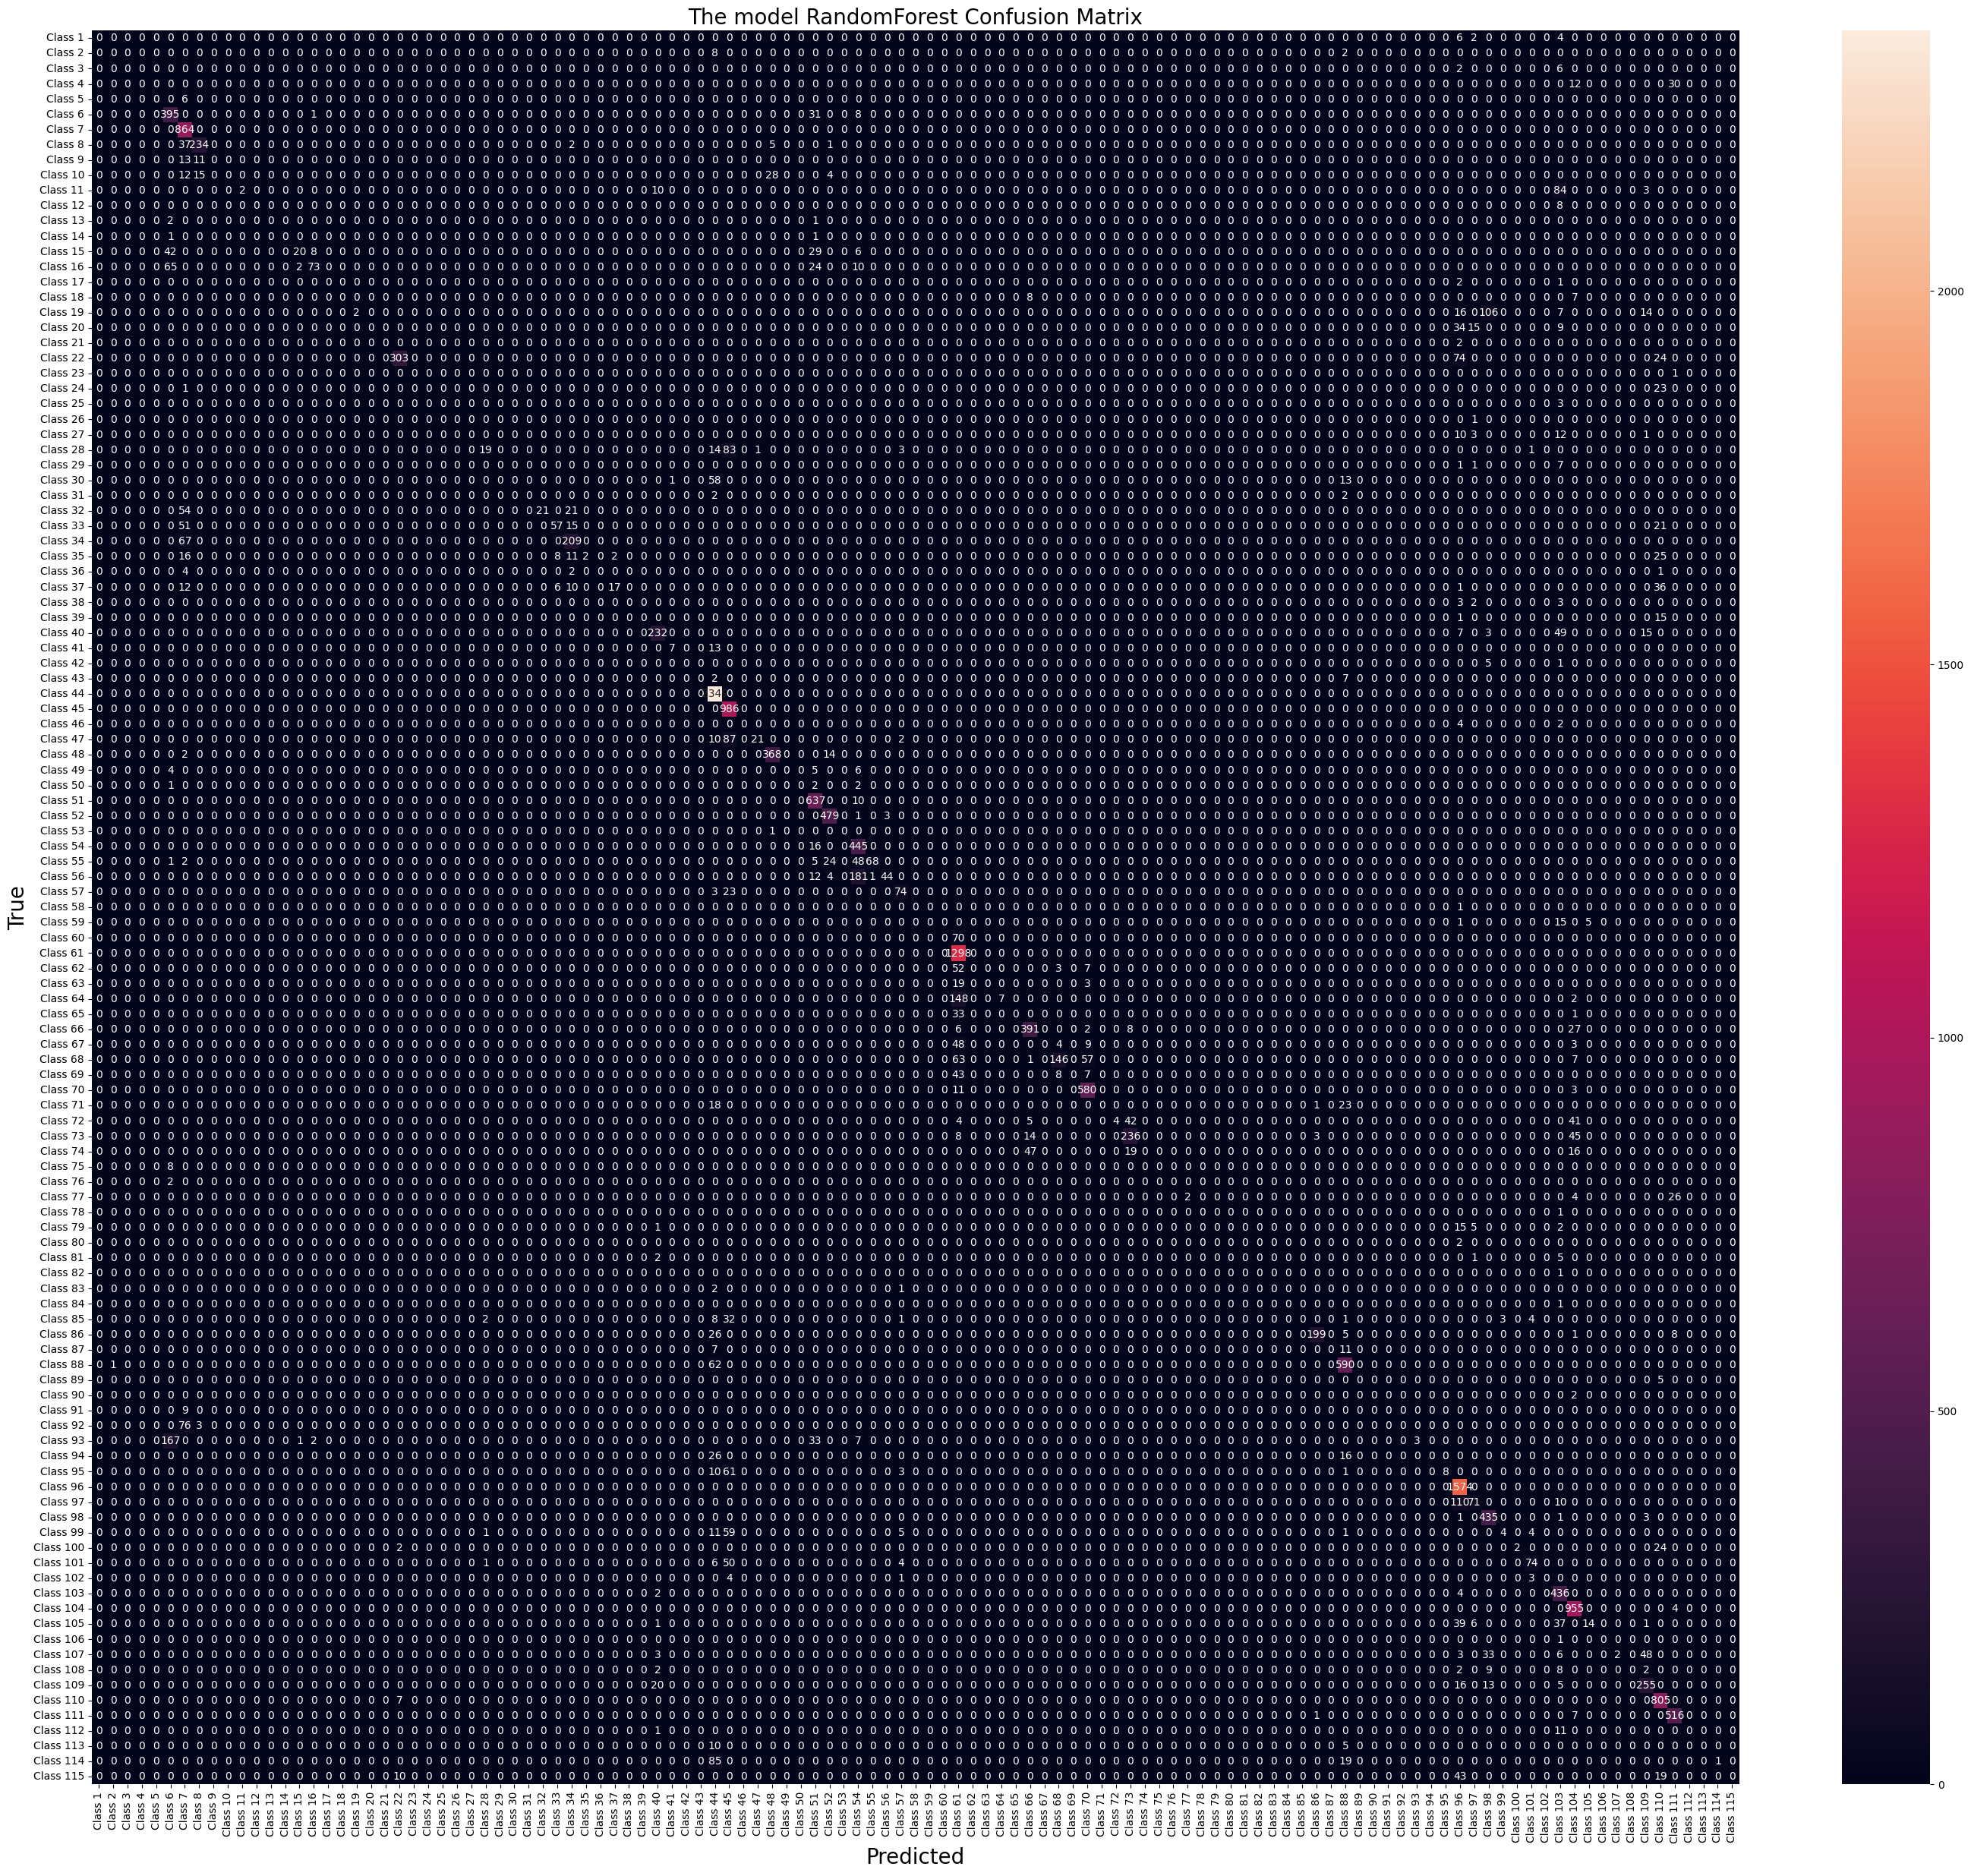

In [42]:
con_matrix(y_test, y_pred,"RandomForest")

In [43]:
print("\n\tClassificatin report for Randomforest\n\n",classification_report(y_test,y_pred, target_names=class_names))


	Classificatin report for Randomforest

               precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00        12
     Class 2       0.00      0.00      0.00        10
     Class 3       0.00      0.00      0.00         8
     Class 4       0.00      0.00      0.00        42
     Class 5       0.00      0.00      0.00         6
     Class 6       0.57      0.91      0.70       435
     Class 7       0.70      1.00      0.83       864
     Class 8       0.89      0.84      0.86       279
     Class 9       0.00      0.00      0.00        24
    Class 10       0.00      0.00      0.00        59
    Class 11       1.00      0.02      0.04        99
    Class 12       0.00      0.00      0.00         8
    Class 13       0.00      0.00      0.00         3
    Class 14       0.00      0.00      0.00         2
    Class 15       0.87      0.19      0.31       105
    Class 16       0.87      0.42      0.57       174
    Class 17       0.00      0.00      

### K Neighbors Classification

Number of neighbors values near to 100 giving a very good accuracy.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

KNeighbors = KNeighborsClassifier(n_neighbors=100)

k_model = KNeighbors.fit(X_train, y_train)

y_pred = k_model.predict(X_test)
print("KNeighbors Accuracy : ",accuracy_score(y_test,y_pred))

KNeighbors Accuracy :  0.72703911677929


In [45]:
con_matrix(y_test, y_pred,"KNeighbors")

In [46]:
print("\n\tClassificatin report for KNeighbors\n\n",classification_report(y_test,y_pred, target_names=class_names))


	Classificatin report for KNeighbors

               precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00        12
     Class 2       0.00      0.00      0.00        10
     Class 3       0.00      0.00      0.00         8
     Class 4       0.00      0.00      0.00        42
     Class 5       0.00      0.00      0.00         6
     Class 6       1.00      1.00      1.00       435
     Class 7       0.99      1.00      1.00       864
     Class 8       0.73      1.00      0.85       279
     Class 9       0.00      0.00      0.00        24
    Class 10       1.00      0.81      0.90        59
    Class 11       0.00      0.00      0.00        99
    Class 12       0.00      0.00      0.00         8
    Class 13       0.00      0.00      0.00         3
    Class 14       0.00      0.00      0.00         2
    Class 15       0.99      1.00      1.00       105
    Class 16       0.98      1.00      0.99       174
    Class 17       0.00      0.00      0.

## Artificial Neural Network

In [47]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

Function to plot the history chart based on epochs

In [48]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show();

Use Standard scalar to fit the given data and convert the y (target) values into categorical format

In [49]:
sc = StandardScaler()
AX_train = pd.DataFrame(sc.fit_transform(X_train))
AX_test = pd.DataFrame(sc.fit_transform(X_test))
Ay_train = to_categorical(y_train)
Ay_test = to_categorical(y_test)

The input shape is 11 based on the number of attributes and output is number of classes.

In [50]:
ann_model = Sequential()
ann_model.add(Dense(121, input_shape = (11,), activation = "relu"))
ann_model.add(Dense(76, activation = "relu"))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(121, activation = "softmax"))
ann_model.compile(Adam(learning_rate = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 121)               1452      
                                                                 
 dense_1 (Dense)             (None, 76)                9272      
                                                                 
 dropout (Dropout)           (None, 76)                0         
                                                                 
 dense_2 (Dense)             (None, 121)               9317      
                                                                 
Total params: 20,041
Trainable params: 20,041
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = ann_model.fit(AX_train, Ay_train, verbose=1, epochs=15)

Epoch 1/15
1533/1533 [==============================] - 12s 4ms/step - loss: 2.0430 - accuracy: 0.4030
Epoch 2/15
1533/1533 [==============================] - 5s 3ms/step - loss: 1.5516 - accuracy: 0.4993
Epoch 3/15
1533/1533 [==============================] - 7s 4ms/step - loss: 1.4524 - accuracy: 0.5216
Epoch 4/15
1533/1533 [==============================] - 5s 3ms/step - loss: 1.4044 - accuracy: 0.5290
Epoch 5/15
1533/1533 [==============================] - 6s 4ms/step - loss: 1.3673 - accuracy: 0.5404
Epoch 6/15
1533/1533 [==============================] - 6s 4ms/step - loss: 1.3385 - accuracy: 0.5445
Epoch 7/15
1533/1533 [==============================] - 5s 3ms/step - loss: 1.3327 - accuracy: 0.5468
Epoch 8/15
1533/1533 [==============================] - 7s 4ms/step - loss: 1.3164 - accuracy: 0.5512
Epoch 9/15
1533/1533 [==============================] - 5s 3ms/step - loss: 1.3039 - accuracy: 0.5553
Epoch 10/15
1533/1533 [==============================] - 8s 5ms/step - loss: 1.27

In [52]:
Ay_pred=ann_model.predict(AX_test) 
Ay_pred_class=np.argmax(Ay_pred,axis=1)
Ay_test_class = np.argmax(Ay_test, axis=1)

657/657 [==============================] - 1s 2ms/step


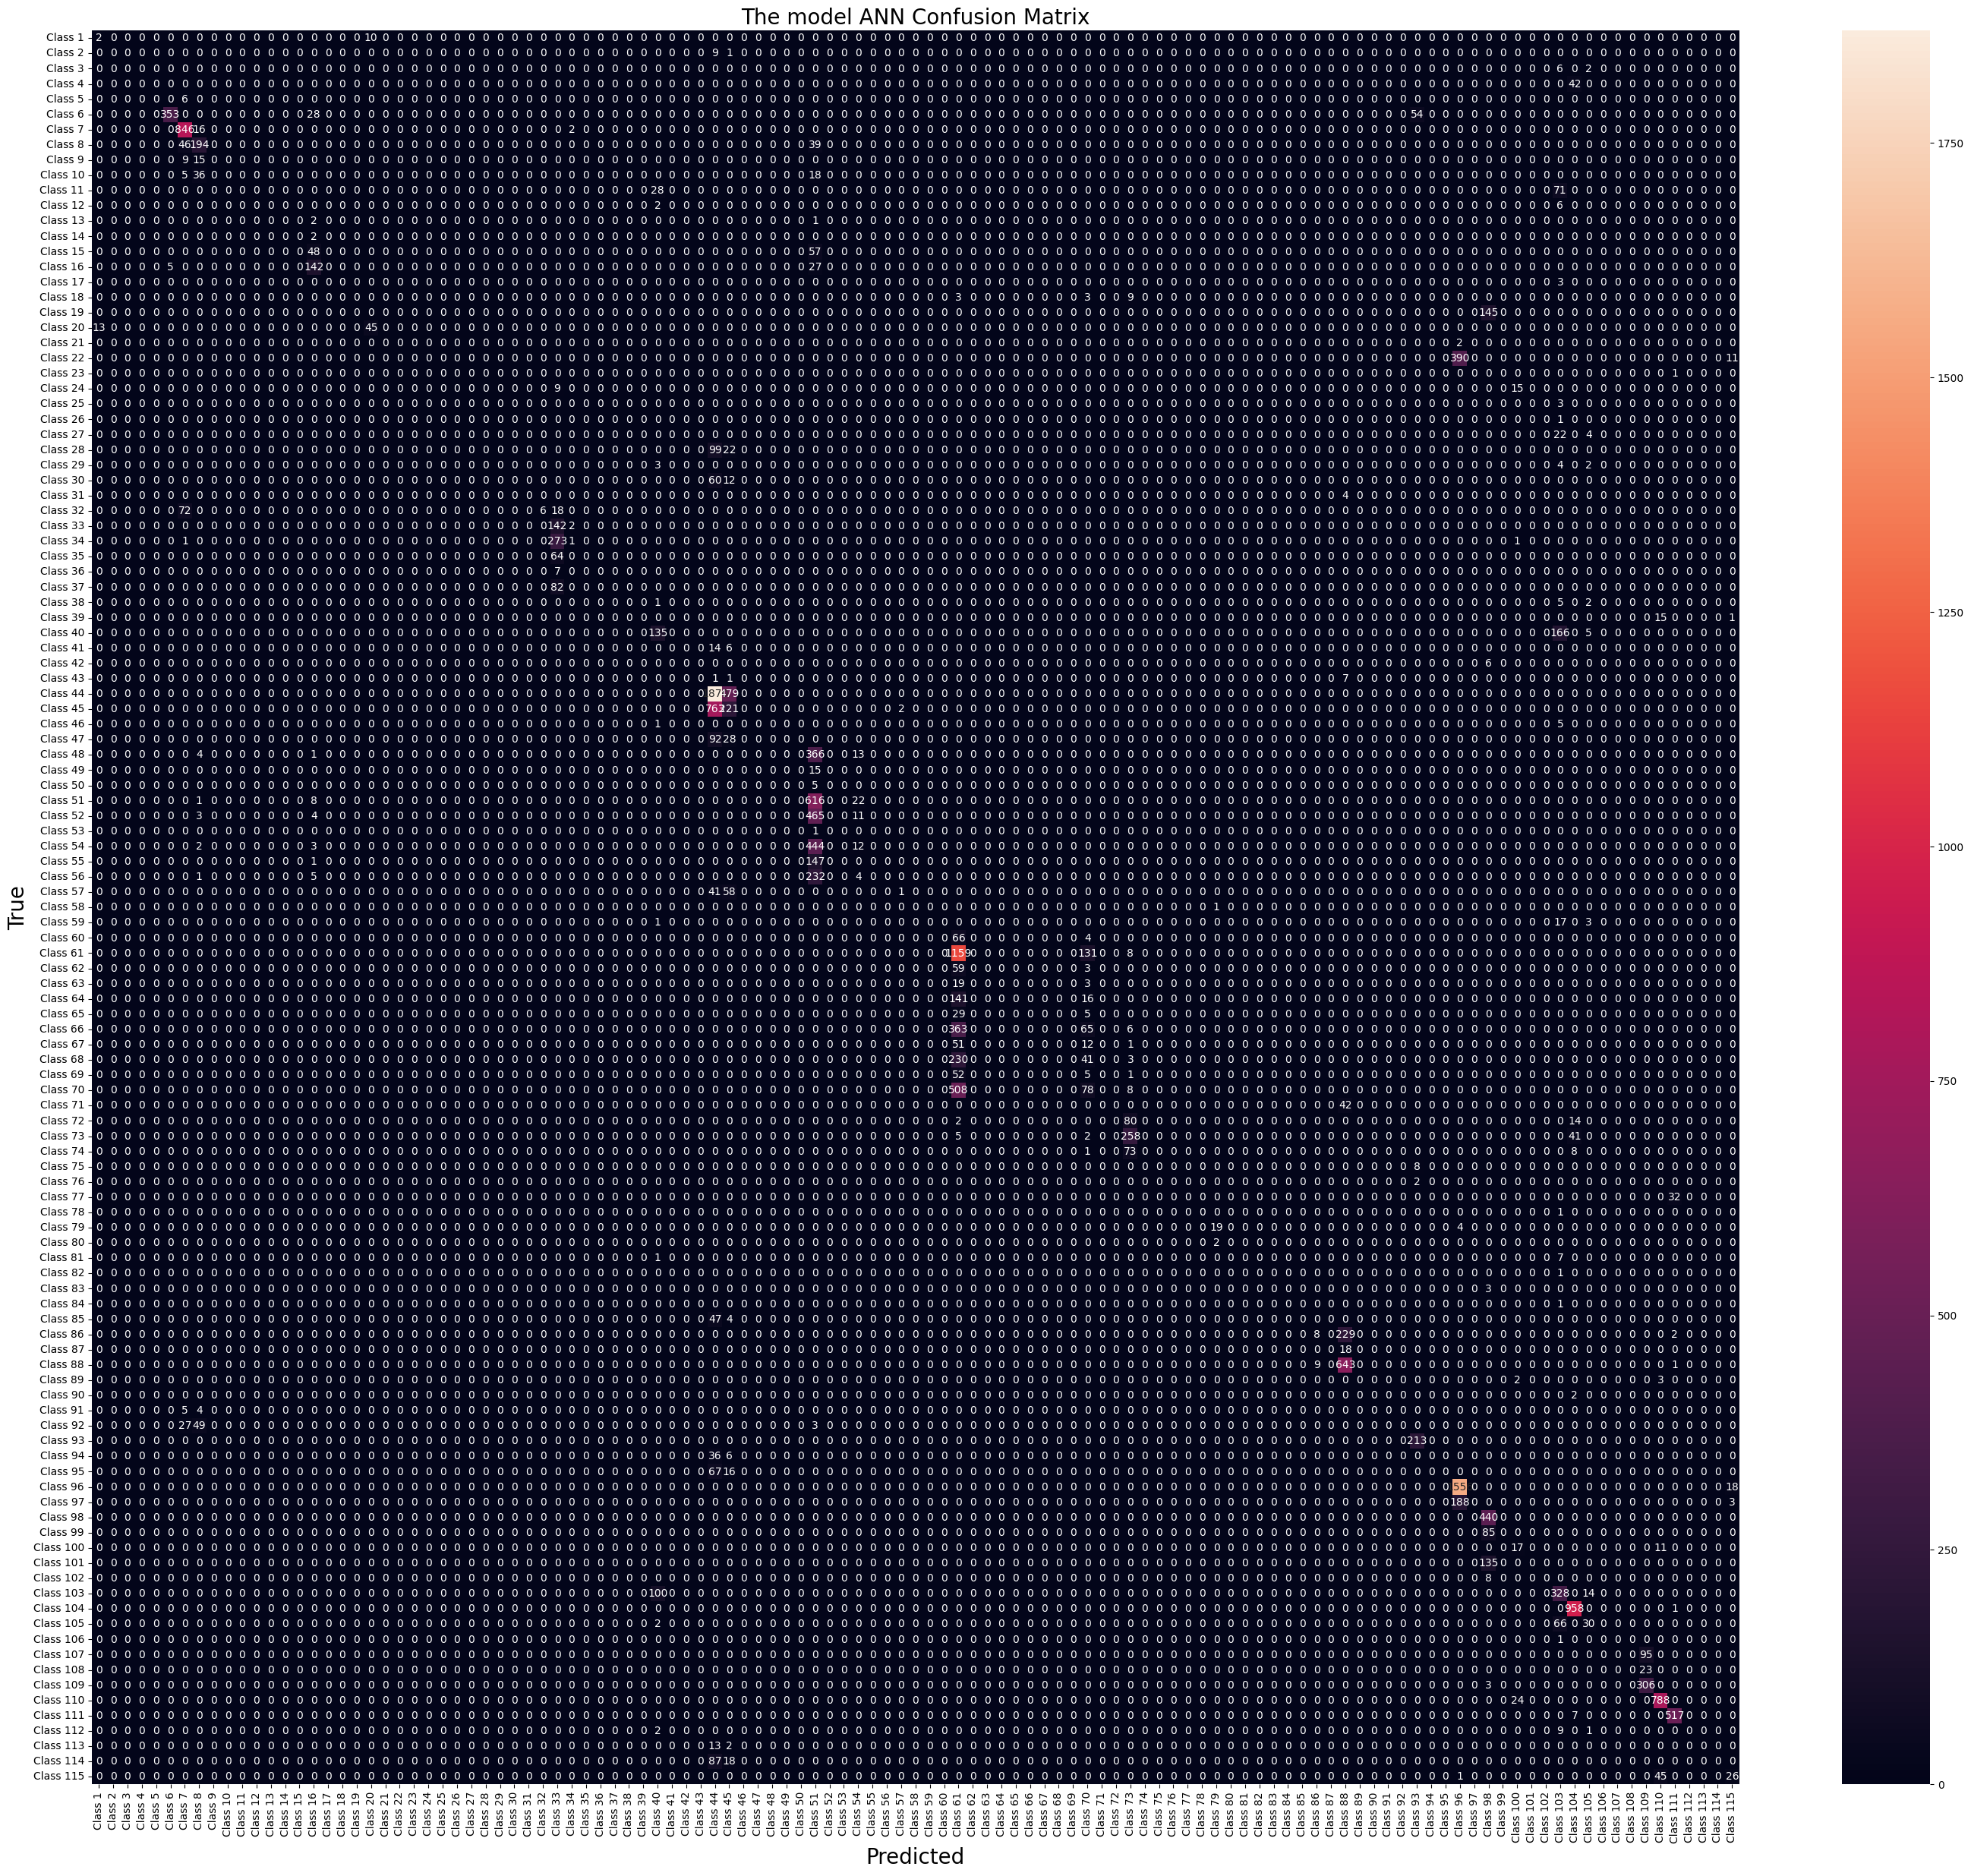

In [53]:
con_matrix(Ay_test_class, Ay_pred_class,"ANN")

In [54]:
print(classification_report(Ay_test_class, Ay_pred_class))

              precision    recall  f1-score   support

           1       0.13      0.17      0.15        12
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         6
           6       0.99      0.81      0.89       435
           7       0.83      0.98      0.90       864
           8       0.60      0.70      0.64       279
           9       0.00      0.00      0.00        24
          10       0.00      0.00      0.00        59
          11       0.00      0.00      0.00        99
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00       105
          16       0.58      0.82      0.68       174
          17       0.00      0.00      0.00         3
          18       0.00    

In [55]:
scores = ann_model.evaluate(AX_test, Ay_test, verbose=0)
print('Test data loss:', scores[0])
print('Test accuracy:', scores[1])

Test data loss: 1.2442466020584106
Test accuracy: 0.5677167773246765


##TabNet

In [56]:
!pip install pytorch_tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 whi

In [57]:
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [58]:
n_total = len(X_train)

train_indices, valid_indices = train_test_split(
    range(n_total), test_size=0.1, random_state=2)

In [59]:
nt_total = len(X_test)
test_indices = [i for i in range(nt_total)]

In [60]:
TX_train = X_train.values[train_indices]
Ty_train = y_train.values[train_indices]

TX_valid = X_train.values[valid_indices]
Ty_valid = y_train.values[valid_indices]

TX_test = X_test.values[test_indices]
Ty_test = y_test.values[test_indices]

The learning rate is initially set to, lr = 0.020

After 20 epochs, a decay rate of 0.95 will be applied

The result is simply the product of our learning rate and decay rate 0.02*0.95
In the next block of code, we fit the model to our data. Basically it says the train and validation sets will be evaluated for a total of 30 iterations (epochs).

The patience parameter states that if an improvement in metrics is not observed after 30 consecutive epochs, the model will stop running and the best weights from the best epoch will be loaded.

The batch size of 1000 was selected based on recommendations from TabNet’s paper, where they suggest a batch size of up to 10% of the total data. They also recommend that the virtual batch size is smaller than the batch size and can be evenly divided into the batch size.


In [61]:
clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

In [62]:
from pytorch_tabnet.augmentations import ClassificationSMOTE
aug = ClassificationSMOTE(p=0.2)

clf.fit(
    X_train=TX_train, y_train=Ty_train,
    eval_set=[(TX_train, Ty_train), (TX_valid, Ty_valid)],
    eval_name=['train', 'valid'],
    max_epochs=40, patience=30,
    batch_size=1000, virtual_batch_size=100,
    augmentations=aug
) 

epoch 0  | loss: 3.41409 | train_accuracy: 0.03794 | valid_accuracy: 0.0361  |  0:00:07s
epoch 1  | loss: 2.37858 | train_accuracy: 0.062   | valid_accuracy: 0.05976 |  0:00:19s
epoch 2  | loss: 2.24878 | train_accuracy: 0.07628 | valid_accuracy: 0.0724  |  0:00:33s
epoch 3  | loss: 2.16998 | train_accuracy: 0.13831 | valid_accuracy: 0.13889 |  0:00:41s
epoch 4  | loss: 2.08841 | train_accuracy: 0.14766 | valid_accuracy: 0.15154 |  0:00:47s
epoch 5  | loss: 1.97304 | train_accuracy: 0.22854 | valid_accuracy: 0.23047 |  0:00:52s
epoch 6  | loss: 1.93711 | train_accuracy: 0.25857 | valid_accuracy: 0.25699 |  0:00:57s
epoch 7  | loss: 1.89613 | train_accuracy: 0.43688 | valid_accuracy: 0.44116 |  0:01:03s
epoch 8  | loss: 1.89931 | train_accuracy: 0.30979 | valid_accuracy: 0.31674 |  0:01:08s
epoch 9  | loss: 1.86421 | train_accuracy: 0.46962 | valid_accuracy: 0.47705 |  0:01:12s
epoch 10 | loss: 1.85448 | train_accuracy: 0.53196 | valid_accuracy: 0.53518 |  0:01:18s
epoch 11 | loss: 1.83

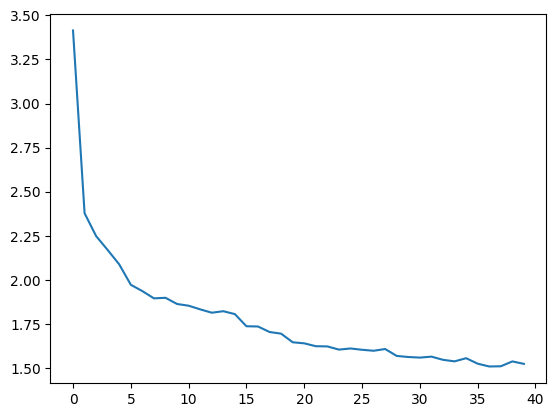

In [63]:
# plot losses
plt.plot(clf.history['loss'])

In [64]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])

In [65]:
# or you can simply use the predict method

y_pred = clf.predict(TX_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=Ty_test)
print(f"FINAL TEST SCORE : {test_acc}")

FINAL TEST SCORE : 0.6335776149233844


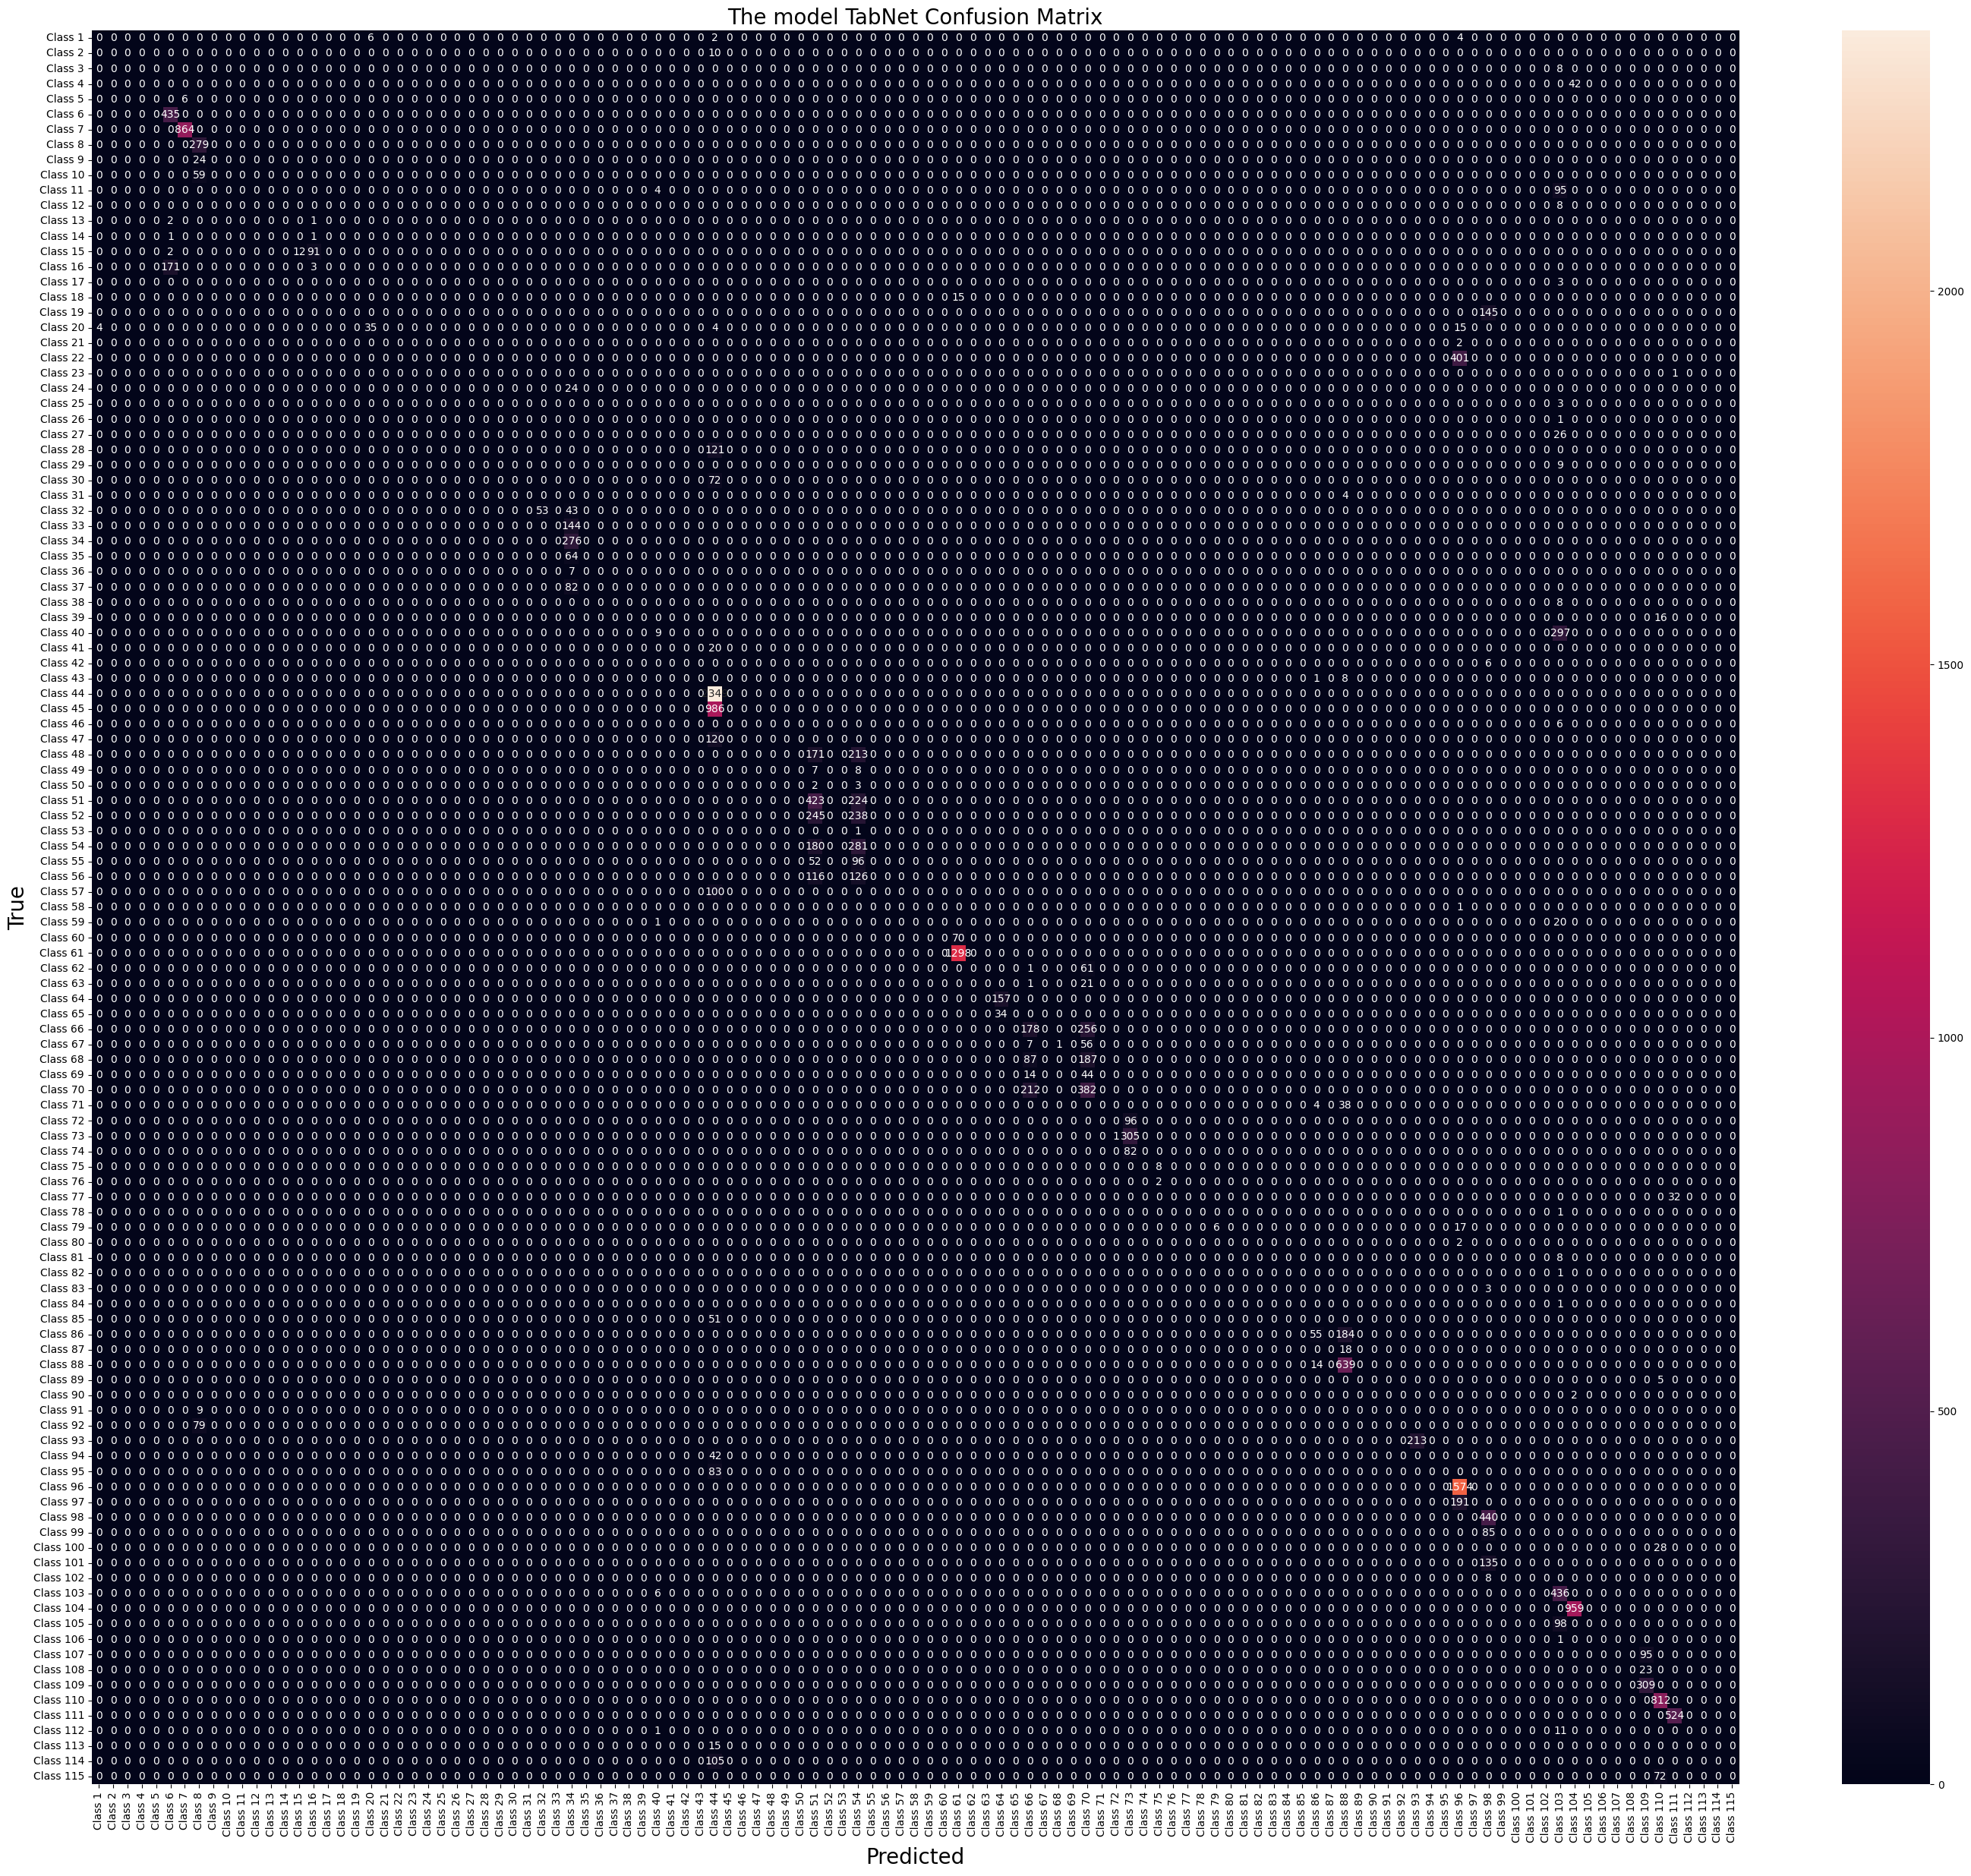

In [66]:
con_matrix(Ty_test, y_pred,"TabNet")

In [67]:
print("\n\tClassificatin report for TabNet\n\n",classification_report(Ty_test,y_pred, target_names=class_names))


	Classificatin report for TabNet

               precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00        12
     Class 2       0.00      0.00      0.00        10
     Class 3       0.00      0.00      0.00         8
     Class 4       0.00      0.00      0.00        42
     Class 5       0.00      0.00      0.00         6
     Class 6       0.71      1.00      0.83       435
     Class 7       0.99      1.00      1.00       864
     Class 8       0.62      1.00      0.77       279
     Class 9       0.00      0.00      0.00        24
    Class 10       0.00      0.00      0.00        59
    Class 11       0.00      0.00      0.00        99
    Class 12       0.00      0.00      0.00         8
    Class 13       0.00      0.00      0.00         3
    Class 14       0.00      0.00      0.00         2
    Class 15       1.00      0.11      0.21       105
    Class 16       0.03      0.02      0.02       174
    Class 17       0.00      0.00      0.00  

# Time Series Analysis

In [68]:
dates = data[(data['Year'] == 2022 )].groupby(['Incident_Date']).agg({'Incident_Num':['count']})
dates.columns = ['Inc_count']

In [69]:
dates.plot()
plt.show()

<Axes: xlabel='Incident_Date'>

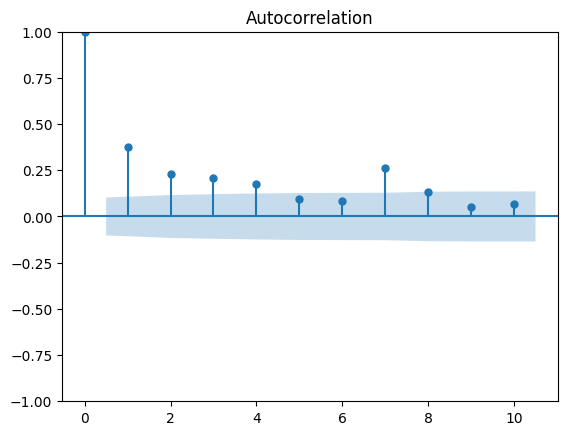

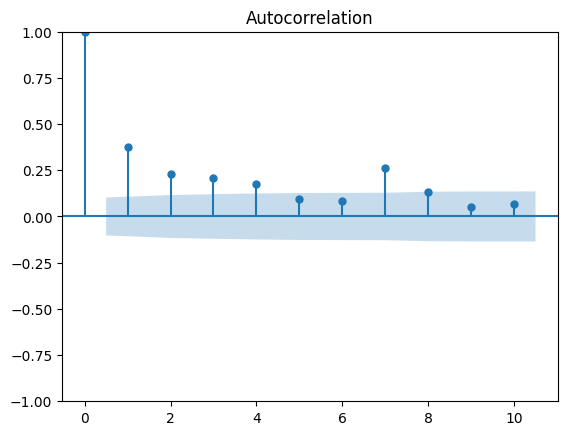

In [70]:
plot_acf(dates, lags = 10)

In [71]:
timeSeries_model = ARIMA(dates, order=(1,1,7))

residuals = pd.DataFrame(timeSeries_model.fit().resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Incident_Date'>

<Axes: ylabel='Density'>

                0
count  365.000000
mean     0.756793
std     24.931380
min    -99.324601
25%    -14.226856
50%      1.203828
75%     15.454746
max    172.000000


In [72]:
D = dates.values
size = int(len(D) * 0.66)
train, test = D[0:size], D[size:len(D)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,7))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted= %f, expected = %f' %(yhat,obs))
    
error = mean_squared_error(test, predictions)
print(' Test MSE : %3f' %error)


plt.plot(test)
plt.plot(predictions, color= 'red')
plt.show()

predicted= 191.302567, expected = 201.000000
predicted= 209.663985, expected = 197.000000
predicted= 190.375828, expected = 246.000000
predicted= 196.709899, expected = 243.000000
predicted= 210.701469, expected = 211.000000
predicted= 211.728685, expected = 188.000000
predicted= 194.728270, expected = 177.000000
predicted= 189.057685, expected = 132.000000
predicted= 164.426423, expected = 140.000000
predicted= 180.643275, expected = 197.000000
predicted= 200.329980, expected = 199.000000
predicted= 201.305789, expected = 193.000000
predicted= 203.028268, expected = 200.000000
predicted= 200.978277, expected = 181.000000
predicted= 180.376325, expected = 230.000000
predicted= 193.961589, expected = 207.000000
predicted= 197.407582, expected = 211.000000
predicted= 199.926270, expected = 224.000000
predicted= 202.003904, expected = 217.000000
predicted= 193.863118, expected = 206.000000
predicted= 190.367466, expected = 174.000000
predicted= 194.221677, expected = 208.000000
predicted=

In [73]:
rmse_error = np.sqrt(mean_squared_error(test, predictions))
print(' Test RMSE : %3f' %rmse_error)

 Test RMSE : 26.897701
